# This Notebook Contains Three Sections
* **Training and Fine tuning Yolov12 On a coustom Plant disease Dataset**
* **Training and Fine Tuning Yolov12 on a weed detection dataset**
* **Model Zoo aproach for infrencing two different finetuned models**
* **Using Gpt's api to understand the crop health**


In [1]:
import os
from google.colab import userdata


In [2]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
new_directory = '/content/drive/MyDrive/Yolov12'

# Change the current working directory
os.chdir(new_directory)

# Verify the change by printing the current working directory
HOME = os.getcwd()
print("Current working directory:", HOME)

Current working directory: /content/drive/MyDrive/Yolov12


**Load the dataset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow

# we have two different datsets , with the same classes , so we are combining them

rf = Roboflow(api_key="PXyshJrRfVCmSjU8CGgT")
project_a = rf.workspace("plant-disease-detection-mwyro").project("plant-disease-j1d2c")
version = project_a.version(1)
dataset_a = version.download("yolov12")


project_b = rf.workspace("graduation-project-2023").project("plants-diseases-detection-and-classification")
version = project_b.version(12)
dataset_b = version.download("yolov12")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...


KeyboardInterrupt: 

**Load the Yolov12 Model**

In [5]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 59.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 140.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 115.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!wget https://media.roboflow.com/notebooks/examples/dog.jpeg # test image download

--2025-04-18 17:27:38--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg.3’

dog.jpeg.3          100%[===================>] 103.57K  --.-KB/s    in 0.006s  

2025-04-18 17:27:38 (17.3 MB/s) - ‘dog.jpeg.3’ saved [106055/106055]



**Test the Yolov12 model**

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

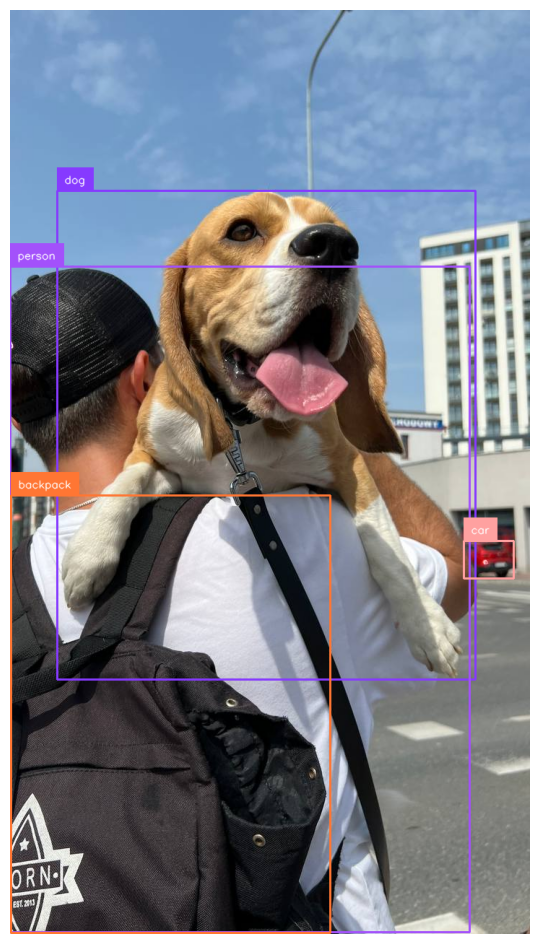

In [58]:
import cv2
from ultralytics import YOLO
import supervision as sv


image_path = f"{HOME}/dog.jpeg"
image = cv2.imread(image_path)

model = YOLO('yolov12m.pt')

results = model(image, verbose=False)[0]
print(results)
detections = sv.Detections.from_ultralytics(results)
print(detections)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = image.copy()
annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

**Creating a combined Data.yaml File to merege the dataset**

In [ ]:
import yaml
from pathlib import Path

# ─── Adjust these paths to point to your downloaded datasets ─────────────────
path_a = Path("/content/drive/MyDrive/Yolov12/plant-disease-1/data.yaml")
path_b = Path("/content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/data.yaml")
out_path = Path("data/combined.yaml")
# ─────────────────────────────────────────────────────────────────────────────

# 1. Load both YAML files
with open(path_a) as f:
    data_a = yaml.safe_load(f)
with open(path_b) as f:
    data_b = yaml.safe_load(f)

names_a = data_a["names"]
names_b = data_b["names"]

set_a = set(names_a)
set_b = set(names_b)

# 2. Compute overlaps and uniques
common   = sorted(set_a & set_b)
only_a   = sorted(set_a - set_b)
only_b   = sorted(set_b - set_a)

print(f"🔹 Classes in A only ({len(only_a)}): {only_a}")
print(f"🔹 Classes in B only ({len(only_b)}): {only_b}")
print(f"🔹 Classes in both   ({len(common)}): {common}")

# 3. Build unified class list
#    We’ll keep ordering: first all common (in original A order), then uniques from A, then uniques from B
merged = []
for name in names_a:
    if name in common and name not in merged:
        merged.append(name)
for name in names_a:
    if name in only_a:
        merged.append(name)
for name in names_b:
    if name in only_b:
        merged.append(name)

# 4. Assemble combined YAML structure
combined = {
    "train": [
        "/content/drive/MyDrive/Yolov12/plant-disease-1/train/images",
        "/content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/train/images",
    ],
    "val": [
        "/content/drive/MyDrive/Yolov12/plant-disease-1/valid/images",
        "/content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/images",
    ],
    "nc": len(merged),
    "names": merged,
}

# Ensure output directory exists
out_path.parent.mkdir(parents=True, exist_ok=True)

# 5. Write combined YAML
with open(out_path, "w") as f:
    yaml.dump(combined, f, sort_keys=False)

print(f"\n✅ Wrote combined data.yaml with {combined['nc']} classes to {out_path}")

🔹 Classes in A only (0): []
🔹 Classes in B only (0): []
🔹 Classes in both   (29): ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']

✅ Wrote combined data.yaml with 29 classes to data/combined.yaml


**Validation of the Training set**

In [ ]:
import yaml
import os
import cv2
import random
import numpy as np
from pathlib import Path

# 1️⃣ Load your combined config (adjust path if needed)
cfg_path = Path('data/combined.yaml')  # or 'combined.yaml'
assert cfg_path.exists(), f"{cfg_path} not found!"

cfg = yaml.safe_load(cfg_path.read_text())
names = cfg['names']

# 2️⃣ Helper to find mismatches & counts per split
def analyze_split(split):
    print(f"\n=== {split.upper()} SET ===")
    for img_dir in cfg[split]:
        img_dir = Path(img_dir)
        lbl_dir = img_dir.parent / 'labels'
        imgs = sorted(img_dir.glob('*.*'))
        lbls = sorted(lbl_dir.glob('*.txt'))

        img_stems = {i.stem for i in imgs}
        lbl_stems = {l.stem for l in lbls}
        no_label = img_stems - lbl_stems
        no_image = lbl_stems - img_stems

        print(f"\n▶ Folder: {img_dir.parent.name}")
        print(f"• Images: {len(imgs)}, Labels: {len(lbls)}")
        print(f"• Images w/o label: {len(no_label)}")
        print(f"• Labels w/o image: {len(no_image)}")

        # Count boxes per class
        counts = [0]*len(names)
        for l in lbls:
            for line in l.read_text().splitlines():
                c = int(line.split()[0])
                counts[c] += 1

        for i, cls in enumerate(names):
            print(f"   – {cls:30s}: {counts[i]:5d} boxes")

# 3️⃣ Run analysis
analyze_split('train')
analyze_split('val')

# 4️⃣ (Optional) Visual spot‑check
def show_random(n=5):
    import matplotlib.pyplot as plt
    for _ in range(n):
        img_dir = Path(random.choice(cfg['train']))
        imgs = list(img_dir.glob('*.*'))
        img_path = random.choice(imgs)
        lbl_path = img_dir.parent / 'labels' / (img_path.stem + '.txt')
        img = cv2.imread(str(img_path))
        h, w = img.shape[:2]
        if lbl_path.exists():
            for line in lbl_path.read_text().splitlines():
                c, x, y, bw, bh = map(float, line.split())
                # YOLO format to pixel coords
                x1 = int((x - bw/2)*w)
                y1 = int((y - bh/2)*h)
                x2 = int((x + bw/2)*w)
                y2 = int((y + bh/2)*h)
                cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
                cv2.putText(img, names[int(c)], (x1, y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)
        plt.figure(figsize=(6,6))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

# Uncomment to spot‑check a few train images:
# show_random(3)



=== TRAIN SET ===

▶ Folder: train
• Images: 2177, Labels: 2177
• Images w/o label: 0
• Labels w/o image: 0
   – Apple Scab Leaf               :   147 boxes
   – Apple leaf                    :   214 boxes
   – Apple rust leaf               :   143 boxes
   – Bell_pepper leaf              :   280 boxes
   – Bell_pepper leaf spot         :   233 boxes
   – Blueberry leaf                :   690 boxes
   – Cherry leaf                   :   194 boxes
   – Corn Gray leaf spot           :    67 boxes
   – Corn leaf blight              :   312 boxes
   – Corn rust leaf                :   109 boxes
   – Peach leaf                    :   536 boxes
   – Potato leaf                   :    11 boxes
   – Potato leaf early blight      :   244 boxes
   – Potato leaf late blight       :   215 boxes
   – Raspberry leaf                :   481 boxes
   – Soyabean leaf                 :   229 boxes
   – Squash Powdery mildew leaf    :   219 boxes
   – Strawberry leaf               :   421 boxes
   – Toma

In [ ]:

from ultralytics import YOLO

# 1. Load the YOLOv12m checkpoint
model = YOLO('yolov12m.pt')

# 2. Start training with your existing hyperparameters
results = model.train(
    data='/content/drive/MyDrive/Yolov12/data/combined.yaml',     # path to your merged data.yaml
    epochs=50,                     # total training epochs
    batch=16,                      # batch size
    imgsz=640,                     # image resolution
    project='runs/detect',          # folder to store logs & weights
    name='yolov12m_train',         # subfolder name
    optimizer='adam',              # optimizer
    lr0=1e-3,
    lrf=0.01,
    weight_decay=1e-4,
    warmup_epochs=3,
    warmup_momentum=0.9,
    warmup_bias_lr=1e-2,
    patience=20,
    conf=0.01,
    iou=0.7,
    amp=True
)


New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov12m.pt, data=/content/drive/MyDrive/Yolov12/data/combined.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov12m_train, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.01, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

100%|██████████| 5.26M/5.26M [00:00<00:00, 62.1MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/train/labels... 4194 images, 4 backgrounds, 0 corrupt: 100%|██████████| 4194/4194 [00:26<00:00, 158.10it/s]


train: New cache created: /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/labels... 377 images, 0 backgrounds, 0 corrupt: 100%|██████████| 377/377 [00:02<00:00, 171.18it/s]


val: New cache created: /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache
Plotting labels to runs/detect/yolov12m_train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0001), 137 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch__.torch.nn.modules.c

       1/50      16.8G      1.379      2.918      1.592          8        640: 100%|██████████| 263/263 [00:53<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]

                   all        377       1396      0.386      0.185      0.123     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      16.7G      1.474      2.721      1.649          6        640: 100%|██████████| 263/263 [00:50<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]


                   all        377       1396      0.148      0.345      0.167      0.093

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      16.6G      1.454      2.646      1.653          9        640: 100%|██████████| 263/263 [00:49<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.27it/s]


                   all        377       1396      0.362      0.332      0.221      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      16.6G      1.401      2.501      1.599         11        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        377       1396      0.231      0.402      0.265      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      16.6G      1.374       2.39      1.594          5        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]

                   all        377       1396      0.224      0.409      0.272      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      16.7G      1.348      2.286      1.569         10        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.27it/s]

                   all        377       1396      0.473      0.414      0.352      0.224



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      16.6G      1.323      2.175      1.541         17        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        377       1396      0.387      0.413       0.37      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      16.7G      1.276      2.056      1.521         12        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]

                   all        377       1396      0.355      0.475      0.361       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      16.6G      1.272      1.973        1.5         13        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]


                   all        377       1396      0.507      0.455      0.482      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      16.7G      1.256      1.942      1.488         21        640: 100%|██████████| 263/263 [00:49<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]

                   all        377       1396      0.399      0.516      0.453      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      16.6G      1.248      1.877      1.478          4        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        377       1396      0.409      0.535      0.495      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      16.7G      1.232      1.819      1.471         57        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        377       1396      0.411      0.537      0.496      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      16.7G      1.222      1.779      1.465         10        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all        377       1396       0.49      0.547      0.509      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      16.7G      1.201      1.721      1.446         13        640: 100%|██████████| 263/263 [00:49<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]


                   all        377       1396      0.429      0.571      0.533       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      16.6G      1.193      1.671      1.443         13        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        377       1396      0.474        0.6      0.553      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      16.7G      1.184      1.641      1.435         10        640: 100%|██████████| 263/263 [00:48<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        377       1396      0.536       0.58      0.581      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      16.6G      1.164      1.581      1.422         27        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        377       1396      0.484      0.614      0.591      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      16.7G      1.172      1.559      1.433          4        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.32it/s]

                   all        377       1396      0.635       0.54      0.621      0.439



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      16.7G      1.138      1.499      1.404         11        640: 100%|██████████| 263/263 [00:48<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]


                   all        377       1396      0.544       0.59      0.624      0.434

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      16.7G      1.141      1.469      1.406          6        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        377       1396      0.579      0.608      0.657      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      16.6G      1.128      1.446      1.397          9        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all        377       1396      0.534      0.675      0.647      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      16.7G       1.12      1.407      1.388          6        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.43it/s]

                   all        377       1396      0.563      0.627      0.628      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      16.7G      1.105       1.35       1.38          4        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        377       1396      0.637      0.649      0.684      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      16.7G      1.115      1.339      1.383         15        640: 100%|██████████| 263/263 [00:49<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        377       1396      0.556      0.631      0.634      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      16.7G      1.089      1.325      1.364         13        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        377       1396      0.564      0.692      0.672      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      16.7G      1.098      1.313      1.371         10        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        377       1396      0.609      0.674      0.701      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      16.7G      1.084      1.253      1.361         11        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        377       1396      0.666      0.658       0.71      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      16.7G      1.086      1.232       1.36         14        640: 100%|██████████| 263/263 [00:49<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        377       1396      0.681      0.674      0.731      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      16.7G      1.073      1.232      1.358          8        640: 100%|██████████| 263/263 [00:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]

                   all        377       1396      0.608      0.734      0.726      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      16.7G      1.058      1.207      1.344         19        640: 100%|██████████| 263/263 [00:49<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        377       1396       0.66      0.719       0.74      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      16.7G      1.047      1.161      1.329          6        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        377       1396      0.625      0.701      0.721      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      16.7G      1.044       1.15      1.333         22        640: 100%|██████████| 263/263 [00:48<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        377       1396      0.663      0.727      0.755      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      16.7G      1.023      1.114      1.323         16        640: 100%|██████████| 263/263 [00:48<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        377       1396      0.649      0.728      0.766      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      16.7G       1.04      1.105      1.323          6        640: 100%|██████████| 263/263 [00:49<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]

                   all        377       1396      0.677      0.711      0.753      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      16.6G      1.017      1.085      1.315         11        640: 100%|██████████| 263/263 [00:48<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]

                   all        377       1396      0.665       0.74      0.769      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      16.6G      1.011      1.054      1.306         24        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        377       1396      0.688      0.753      0.784      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      16.7G      0.992      1.039        1.3          5        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        377       1396      0.676       0.76      0.781      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      16.7G     0.9887      1.004      1.295          8        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]

                   all        377       1396      0.673       0.76      0.783      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      16.7G     0.9749     0.9752       1.29         38        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]

                   all        377       1396      0.727      0.737      0.796       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      16.7G     0.9818     0.9693      1.291         11        640: 100%|██████████| 263/263 [00:48<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        377       1396      0.705       0.77      0.802      0.604


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      16.6G     0.9078     0.7835      1.256          6        640: 100%|██████████| 263/263 [00:50<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.32it/s]

                   all        377       1396      0.767      0.733      0.814      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      16.7G     0.8879     0.7272      1.243          4        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]

                   all        377       1396      0.759      0.793      0.832      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      16.6G     0.8723     0.6962      1.232         12        640: 100%|██████████| 263/263 [00:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]

                   all        377       1396      0.762      0.797      0.851       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      16.7G     0.8553     0.6752      1.216          7        640: 100%|██████████| 263/263 [00:48<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]

                   all        377       1396      0.775      0.806      0.845      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      16.6G     0.8385     0.6455      1.208         10        640: 100%|██████████| 263/263 [00:48<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        377       1396      0.772      0.815      0.862       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      16.7G     0.8256     0.6201      1.192         13        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        377       1396      0.805      0.814      0.865      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      16.6G     0.8173     0.6072      1.192          3        640: 100%|██████████| 263/263 [00:48<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]


                   all        377       1396      0.795      0.819      0.865      0.668

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      16.7G     0.7951     0.5732      1.173          9        640: 100%|██████████| 263/263 [00:48<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        377       1396      0.834      0.796      0.873      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      16.7G     0.7843     0.5627      1.165          2        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]

                   all        377       1396      0.829      0.808      0.878      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      16.7G     0.7797     0.5552      1.161          9        640: 100%|██████████| 263/263 [00:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        377       1396      0.808      0.824       0.88      0.689



50 epochs completed in 0.734 hours.
Optimizer stripped from runs/detect/yolov12m_train/weights/last.pt, 39.8MB
Optimizer stripped from runs/detect/yolov12m_train/weights/best.pt, 39.8MB

Validating runs/detect/yolov12m_train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 402 layers, 19,598,887 parameters, 0 gradients, 59.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]


                   all        377       1396      0.808      0.824       0.88       0.69
       Apple Scab Leaf         10         21      0.796      0.857      0.899      0.716
            Apple leaf         15         33      0.893          1      0.984      0.766
       Apple rust leaf         16         44       0.84      0.886      0.941      0.596
      Bell_pepper leaf          4         30      0.732        0.7      0.796      0.569
 Bell_pepper leaf spot          4         20      0.793       0.96      0.965       0.74
        Blueberry leaf         21        213      0.702      0.836      0.837      0.574
           Cherry leaf          4         21      0.832          1      0.976      0.805
   Corn Gray leaf spot         11         11      0.658      0.545      0.716      0.601
      Corn leaf blight         32         59       0.86      0.864      0.917      0.742
        Corn rust leaf         20         23      0.907          1       0.99      0.849
            Peach lea

**Validating the model**

In [ ]:
# After training, you can validate the best model to see final metrics:
best_model_path = "/content/drive/MyDrive/Yolov12/runs/detect/yolov12m_train/weights/best.pt" # path to best model (e.g., runs/detect/train_yolo11s/weights/best.pt)
# model = YOLO(best_model_path)
metrics = YOLO(best_model_path).val(data='/content/drive/MyDrive/Yolov12/data/combined.yaml', imgsz=640, batch=16)
print(metrics)

Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 402 layers, 19,598,887 parameters, 0 gradients, 59.6 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]
val: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache... 377 images, 0 backgrounds, 0 corrupt: 100%|██████████| 377/377 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:11<00:00,  2.01it/s]


                   all        377       1396      0.808      0.823      0.879       0.68
       Apple Scab Leaf         10         21      0.796      0.857      0.905      0.718
            Apple leaf         15         33      0.894          1      0.984      0.756
       Apple rust leaf         16         44      0.841      0.886      0.941      0.585
      Bell_pepper leaf          4         30      0.732        0.7      0.796      0.559
 Bell_pepper leaf spot          4         20      0.793      0.957      0.965      0.733
        Blueberry leaf         21        213      0.706      0.836      0.837      0.562
           Cherry leaf          4         21      0.833          1      0.976      0.794
   Corn Gray leaf spot         11         11      0.659      0.545      0.707      0.585
      Corn leaf blight         32         59      0.861      0.864      0.906       0.72
        Corn rust leaf         20         23      0.908          1       0.99      0.833
            Peach lea

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/yolov12m_train/

args.yaml					     train_batch10520.jpg
confusion_matrix_normalized.png			     train_batch10521.jpg
confusion_matrix.png				     train_batch10522.jpg
events.out.tfevents.1744960803.fd13bffdabe5.41397.1  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights
train_batch0.jpg


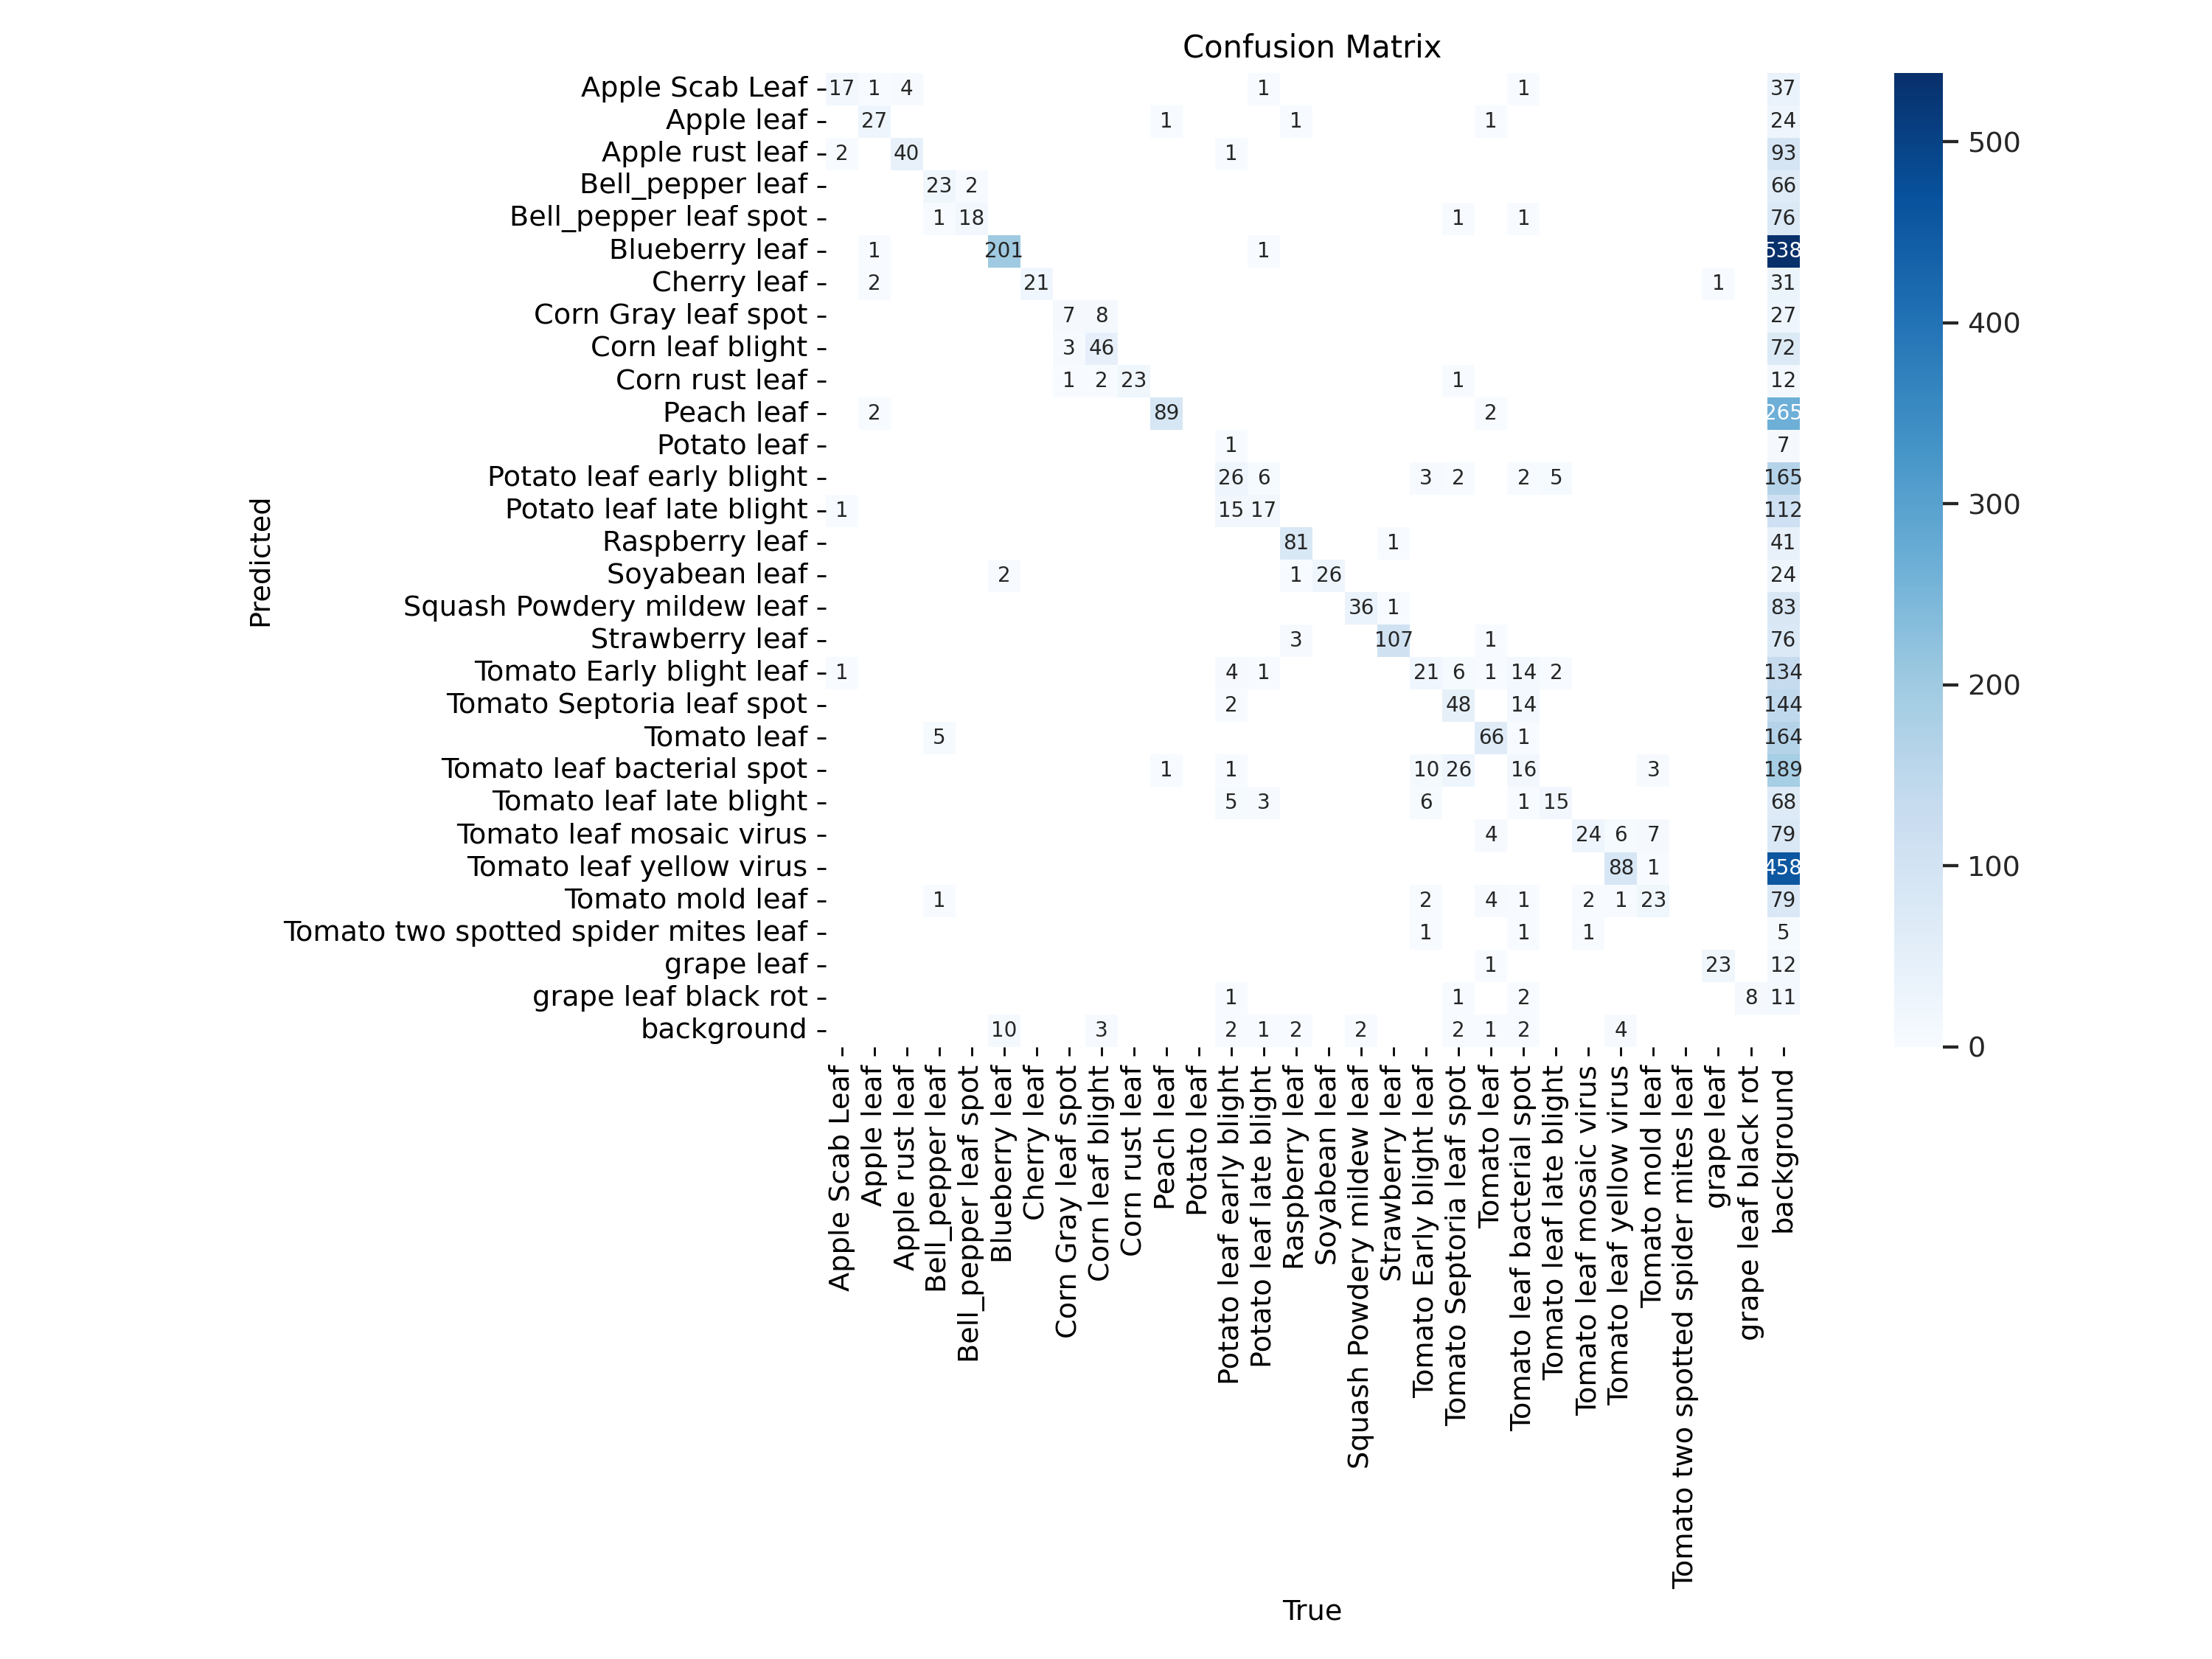

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_train/confusion_matrix.png', width=1000)

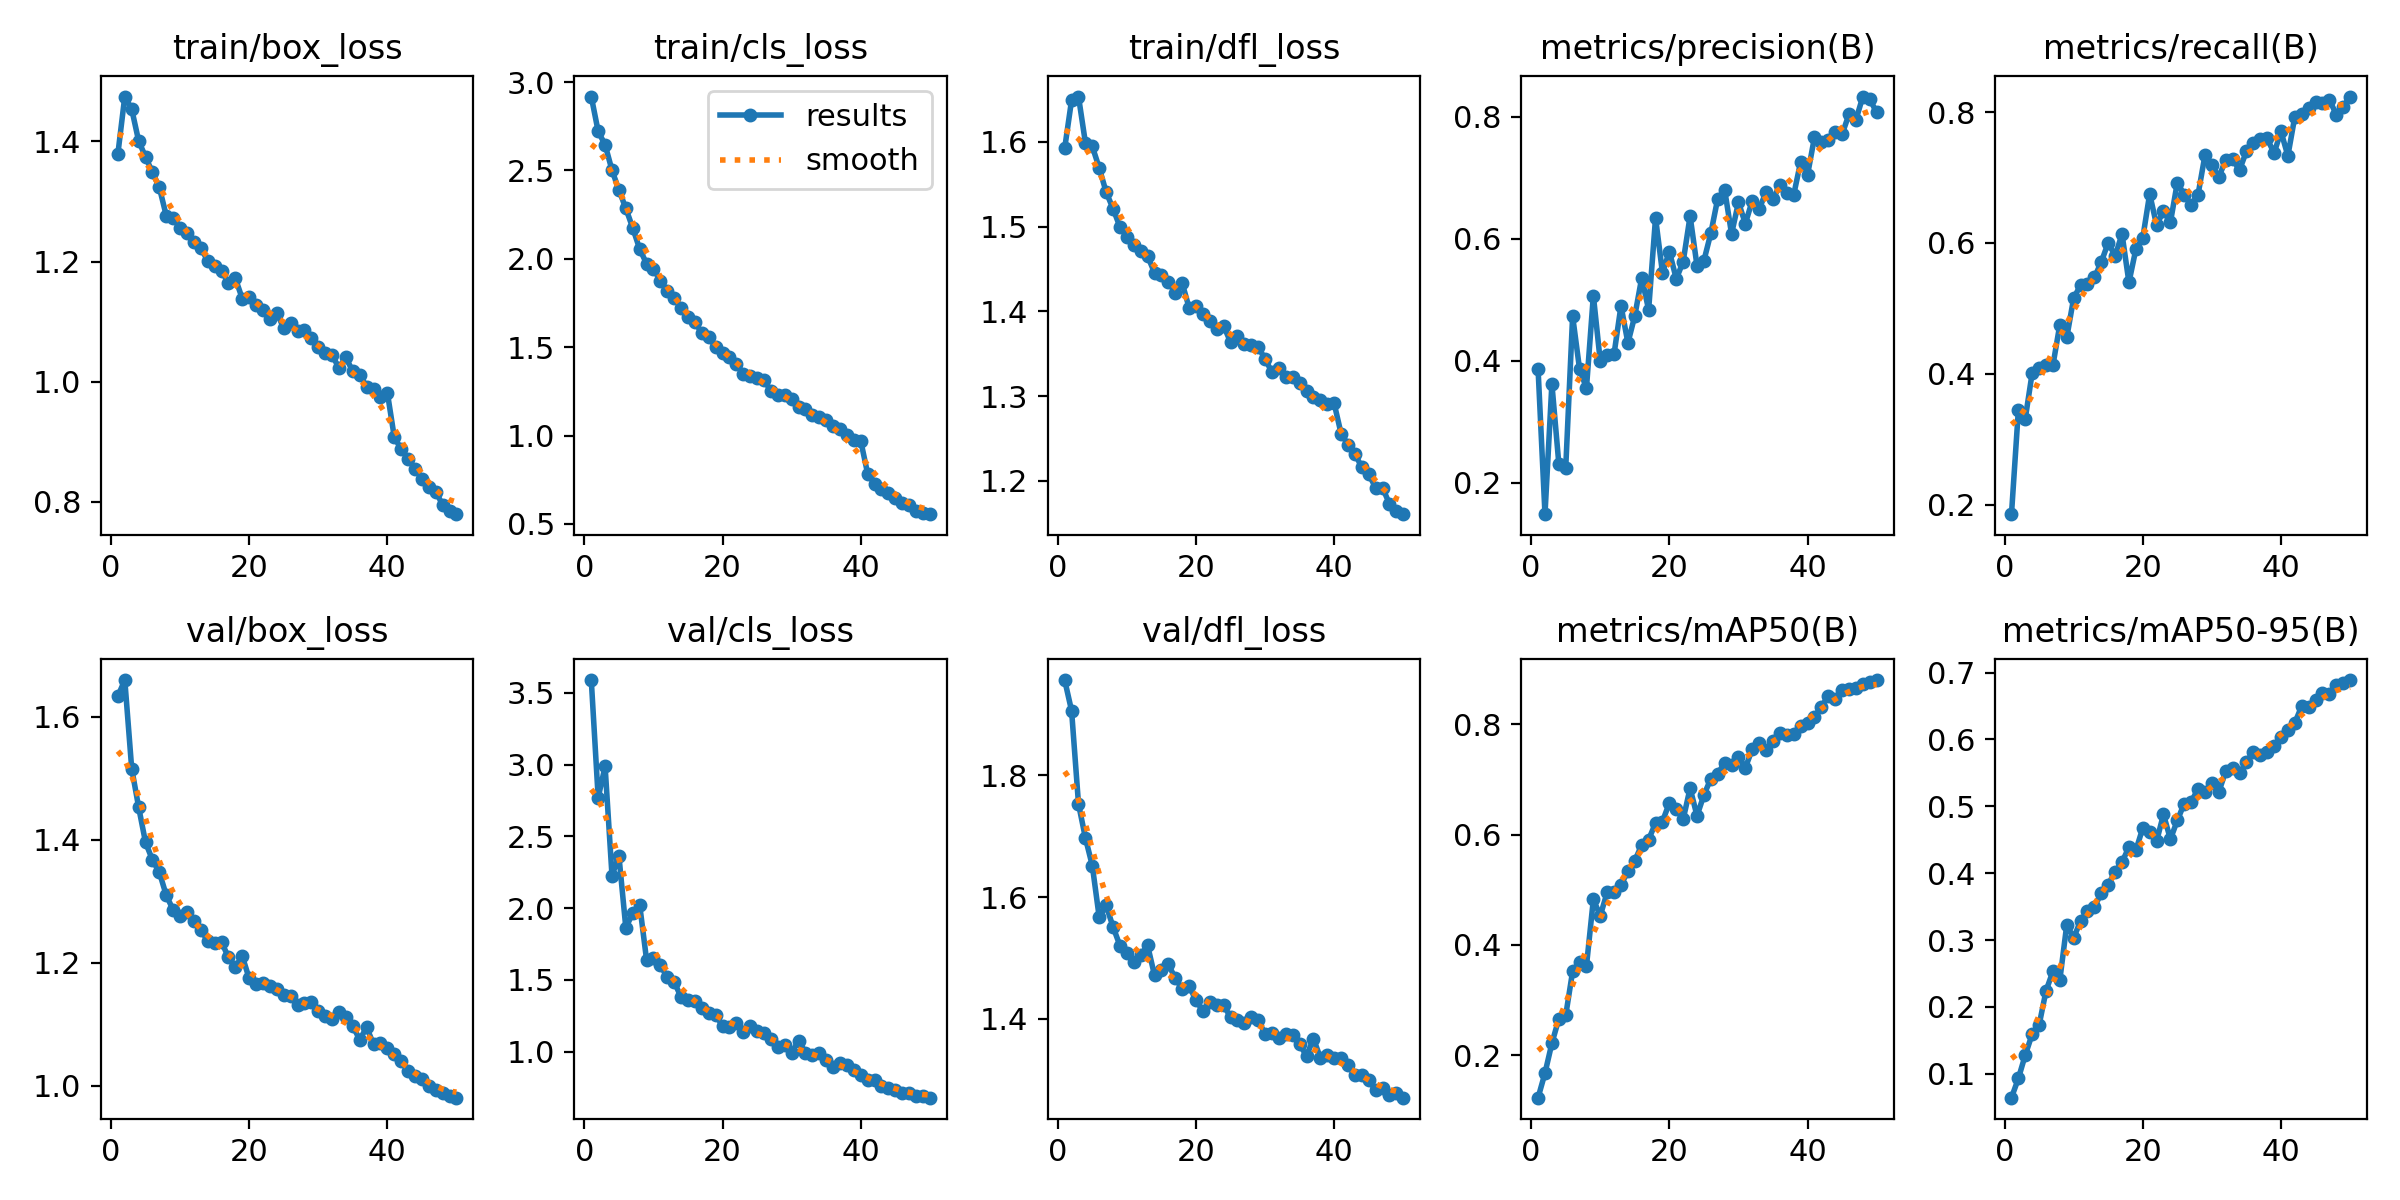

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_train/results.png', width=1000)

In [ ]:
import yaml
from pathlib import Path
from ultralytics import YOLO
import supervision as sv
from supervision.metrics import MeanAveragePrecision

# 1) Read your unified classes (optional, just to inspect)
cfg     = yaml.safe_load(Path('./data/combined.yaml').read_text())
classes = cfg['names']
print("Unified classes:", classes)

# 2) Load each test split, telling from_yolo to use data/combined.yaml
ds_a = sv.DetectionDataset.from_yolo(
    images_directory_path      = './plant-disease-1/test/images',
    annotations_directory_path = './plant-disease-1/test/labels',
    data_yaml_path             = './data/combined.yaml'   # <-- unified class list
)
ds_b = sv.DetectionDataset.from_yolo(
    images_directory_path      = './plants-diseases-detection-and-classification-12/test/images',
    annotations_directory_path = './plants-diseases-detection-and-classification-12/test/labels',
    data_yaml_path             = './data/combined.yaml'
)



# 4) Load your best YOLOv12m checkpoint
model = YOLO('runs/detect/yolov12m_train/weights/best.pt')

# 4) Collect predictions & targets by iterating both datasets
predictions, targets = [], []

for ds in (ds_a, ds_b):
    for img_path, image, target in ds:           # unpack path, image array, annotation
        results    = model(image, verbose=False)[0]
        dets       = sv.Detections.from_ultralytics(results)
        predictions.append(dets)
        targets.append(target)

# 5) Compute mAP
map_metric = MeanAveragePrecision()
map_metric.update(predictions, targets)
results_ = map_metric.compute()



# 1) Print the whole object for a quick overview


print([a for a in dir(results_) if not a.startswith("_")])

# Then you can print:
print(f"mAP @ 0.50    : {results_.map50:.4f}")
print(f"mAP @ 0.75    : {results_.map75:.4f}")
print(f"mAP @ 0.50‑95 : {results_.map50_95:.4f}")

# # 2) Access the main fields directly
# #   - mAP50   is the metric at IoU = 0.5
# #   - mAP50-95 is the averaged metric across IoUs 0.5→0.95
# #   - You may also have `map_75` for mAP@0.75, `ar1` for average recall at 1 detection, etc.
# print(f"mAP @ 0.50    : {results_.map_50:.4f}")
# print(f"mAP @ 0.50–0.95: {results_.map_50_95:.4f}")

# # 3) If you want every attribute dynamically:
# for attr in dir(results_):
#     if not attr.startswith("_"):
#         val = getattr(results_, attr)
#         # only print numeric metrics
#         if isinstance(val, (float, int)):
#             print(f"{attr:12s}: {val:.4f}")

Unified classes: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']
['ap_per_class', 'iou_thresholds', 'is_class_agnostic', 'large_objects', 'mAP_scores', 'map50', 'map50_95', 'map75', 'matched_classes', 'medium_objects', 'metric_target', 'plot', 'small_objects', 'to_pandas']
mAP @ 0.50    : 0.7697
mAP @ 0.75    : 0.7060
mAP @ 0.50‑95 : 0.5962


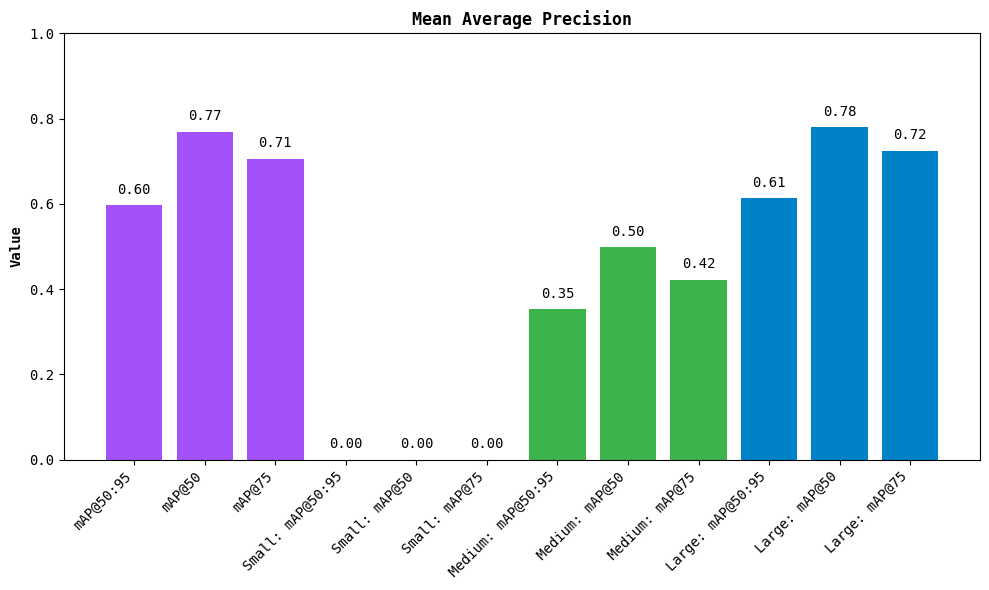

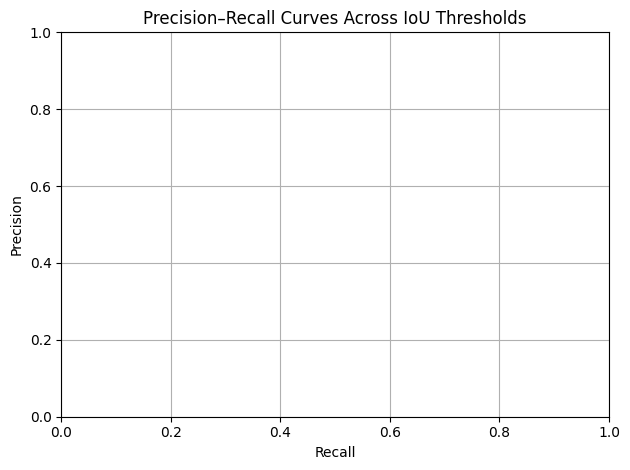

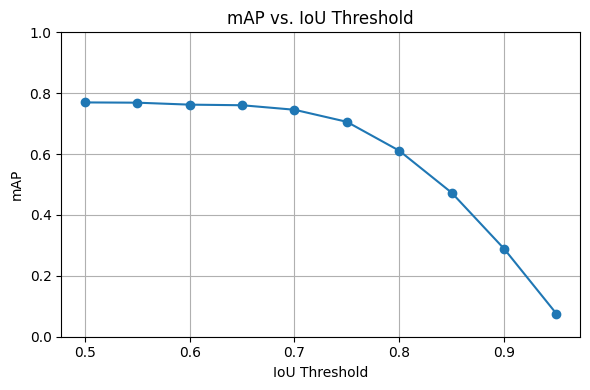

In [ ]:
import matplotlib.pyplot as plt

# 1) Plot precision-recall curves per class
fig = results_.plot()
plt.title("Precision–Recall Curves Across IoU Thresholds")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6) Plot mAP vs IoU threshold
plt.figure(figsize=(6,4))
plt.plot(results_.iou_thresholds, results_.mAP_scores, marker='o')
plt.title("mAP vs. IoU Threshold")
plt.xlabel("IoU Threshold")
plt.ylabel("mAP")
plt.ylim(0,1)
plt.grid(True)
plt.tight_layout()
plt.show()

**Fine tuning further with a lower learning rate**


In [ ]:
# 1) Load your current best model
orig_ckpt = './runs/detect/yolov12m_train/weights/best.pt'
model     = YOLO(orig_ckpt)

# 2) Fine‐tune for 20 epochs with LR = 1e‑4
ft_results = model.train(
    data='./data/combined.yaml',
    epochs=25,            # extra epochs
    batch=16,
    imgsz=640,
    project='./runs/detect',
    name='yolov12m_finetune2',
    optimizer='adam',
    lr0=1e-4,             # 10× lower initial LR
    lrf=0.01,             # final LR = lr0 * 0.01
    weight_decay=1e-4,
    warmup_epochs=3,
    patience=10,          # shorter early‑stop
    amp=True
)

# 3) Re‐validate on your combined test set
best_ft = f"runs/detect/yolov12m_finetune2/weights/best.pt"
metrics = YOLO(best_ft).val(data='data/combined.yaml', imgsz=640, batch=16)
print(metrics)

New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=./runs/detect/yolov12m_train/weights/best.pt, data=./data/combined.yaml, epochs=25, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=./runs/detect, name=yolov12m_finetune2, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

train: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/train/labels.cache... 4194 images, 4 backgrounds, 0 corrupt: 100%|██████████| 4194/4194 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache... 377 images, 0 backgrounds, 0 corrupt: 100%|██████████| 377/377 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov12m_finetune2/labels.jpg... 
optimizer: Adam(lr=0.0001, momentum=0.937) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0001), 137 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_19 : __torch__.ultralytics.nn.modules.conv.Concat 

       1/25       9.5G     0.9174     0.9035      1.244          8        640: 100%|██████████| 263/263 [02:11<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.27it/s]

                   all        377       1396       0.82      0.795      0.864      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      9.44G     0.9064     0.8348      1.236          6        640: 100%|██████████| 263/263 [00:48<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        377       1396      0.797      0.799      0.867      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      9.41G     0.8952     0.8274      1.233          9        640: 100%|██████████| 263/263 [00:47<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]

                   all        377       1396      0.814      0.779      0.854      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      9.35G     0.8863     0.8244      1.221         11        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]

                   all        377       1396      0.793      0.809      0.857       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25       9.4G     0.8813     0.8128      1.225          5        640: 100%|██████████| 263/263 [00:46<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        377       1396      0.807      0.817      0.869      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      9.44G     0.8769     0.8016      1.222         10        640: 100%|██████████| 263/263 [00:47<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        377       1396       0.83        0.8      0.874      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      9.38G     0.8831      0.795      1.215         17        640: 100%|██████████| 263/263 [00:47<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all        377       1396      0.821        0.8       0.87      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      9.46G     0.8614     0.7832      1.213         12        640: 100%|██████████| 263/263 [00:47<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        377       1396      0.808      0.828      0.878      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      9.41G     0.8668     0.7644      1.208         13        640: 100%|██████████| 263/263 [00:47<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        377       1396      0.817      0.807      0.876      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      9.48G     0.8649     0.7665       1.21         21        640: 100%|██████████| 263/263 [00:47<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        377       1396      0.829      0.806      0.872      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      9.41G     0.8561     0.7637      1.204          4        640: 100%|██████████| 263/263 [00:46<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        377       1396      0.815      0.828      0.881      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      9.46G     0.8577     0.7566      1.203         57        640: 100%|██████████| 263/263 [00:47<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        377       1396      0.796      0.821       0.87      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      9.41G     0.8585     0.7604      1.205         10        640: 100%|██████████| 263/263 [00:46<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all        377       1396      0.834       0.81      0.882      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      9.44G     0.8514     0.7421      1.197         13        640: 100%|██████████| 263/263 [00:47<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]


                   all        377       1396      0.843      0.795      0.877      0.684

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      9.41G     0.8386     0.7371      1.192         13        640: 100%|██████████| 263/263 [00:47<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]

                   all        377       1396      0.835      0.832      0.885      0.689


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      9.46G     0.7551     0.5473      1.142          2        640: 100%|██████████| 263/263 [00:48<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]

                   all        377       1396      0.849       0.82      0.886      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      9.39G     0.7415     0.5148      1.133          9        640: 100%|██████████| 263/263 [00:46<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]

                   all        377       1396      0.856      0.821      0.891      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      9.45G     0.7315     0.5052       1.13         18        640: 100%|██████████| 263/263 [00:46<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]

                   all        377       1396      0.872       0.82      0.896        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      9.43G     0.7243      0.484      1.126          2        640: 100%|██████████| 263/263 [00:46<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.56it/s]

                   all        377       1396      0.852      0.826      0.894      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      9.44G      0.715     0.4812      1.115          2        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        377       1396      0.839      0.852        0.9      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25       9.4G     0.7157     0.4759      1.119          4        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        377       1396      0.871      0.829      0.902      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      9.45G     0.7123     0.4702      1.114          8        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.58it/s]

                   all        377       1396      0.861       0.84      0.905      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      9.43G     0.7123     0.4746      1.113         17        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        377       1396      0.837      0.865      0.906      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      9.45G     0.7025     0.4652       1.11          2        640: 100%|██████████| 263/263 [00:46<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.47it/s]

                   all        377       1396      0.853      0.847      0.904      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      9.43G     0.7115     0.4677       1.11          5        640: 100%|██████████| 263/263 [00:46<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.48it/s]


                   all        377       1396       0.85      0.853      0.904      0.714

25 epochs completed in 0.378 hours.
Optimizer stripped from runs/detect/yolov12m_finetune2/weights/last.pt, 39.8MB
Optimizer stripped from runs/detect/yolov12m_finetune2/weights/best.pt, 39.8MB

Validating runs/detect/yolov12m_finetune2/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 402 layers, 19,598,887 parameters, 0 gradients, 59.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]


                   all        377       1396      0.852      0.846      0.904      0.715
       Apple Scab Leaf         10         21      0.822      0.881      0.927      0.741
            Apple leaf         15         33      0.892          1      0.995      0.787
       Apple rust leaf         16         44      0.957      0.886      0.961      0.619
      Bell_pepper leaf          4         30       0.68      0.633      0.777      0.556
 Bell_pepper leaf spot          4         20      0.904          1      0.988      0.794
        Blueberry leaf         21        213      0.745      0.836      0.854      0.604
           Cherry leaf          4         21      0.776          1      0.978      0.789
   Corn Gray leaf spot         11         11      0.745      0.534      0.786      0.653
      Corn leaf blight         32         59      0.884      0.907      0.924      0.754
        Corn rust leaf         20         23      0.973          1      0.995      0.862
            Peach lea

val: Scanning /content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/valid/labels.cache... 377 images, 0 backgrounds, 0 corrupt: 100%|██████████| 377/377 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:04<00:00,  4.93it/s]


                   all        377       1396      0.853      0.849      0.904      0.715
       Apple Scab Leaf         10         21      0.822      0.882      0.928      0.736
            Apple leaf         15         33      0.889          1      0.995      0.786
       Apple rust leaf         16         44      0.956      0.886      0.961      0.623
      Bell_pepper leaf          4         30      0.679      0.636      0.773      0.554
 Bell_pepper leaf spot          4         20      0.904          1      0.988      0.798
        Blueberry leaf         21        213      0.744      0.836      0.854      0.602
           Cherry leaf          4         21      0.776          1      0.978      0.789
   Corn Gray leaf spot         11         11      0.746      0.536      0.786      0.653
      Corn leaf blight         32         59      0.885      0.911      0.924      0.755
        Corn rust leaf         20         23      0.972          1      0.995      0.854
            Peach lea

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/yolov12m_finetune2/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch3945.jpg
events.out.tfevents.1745005287.4e8e2b2f9103.492.0  train_batch3946.jpg
F1_curve.png					   train_batch3947.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


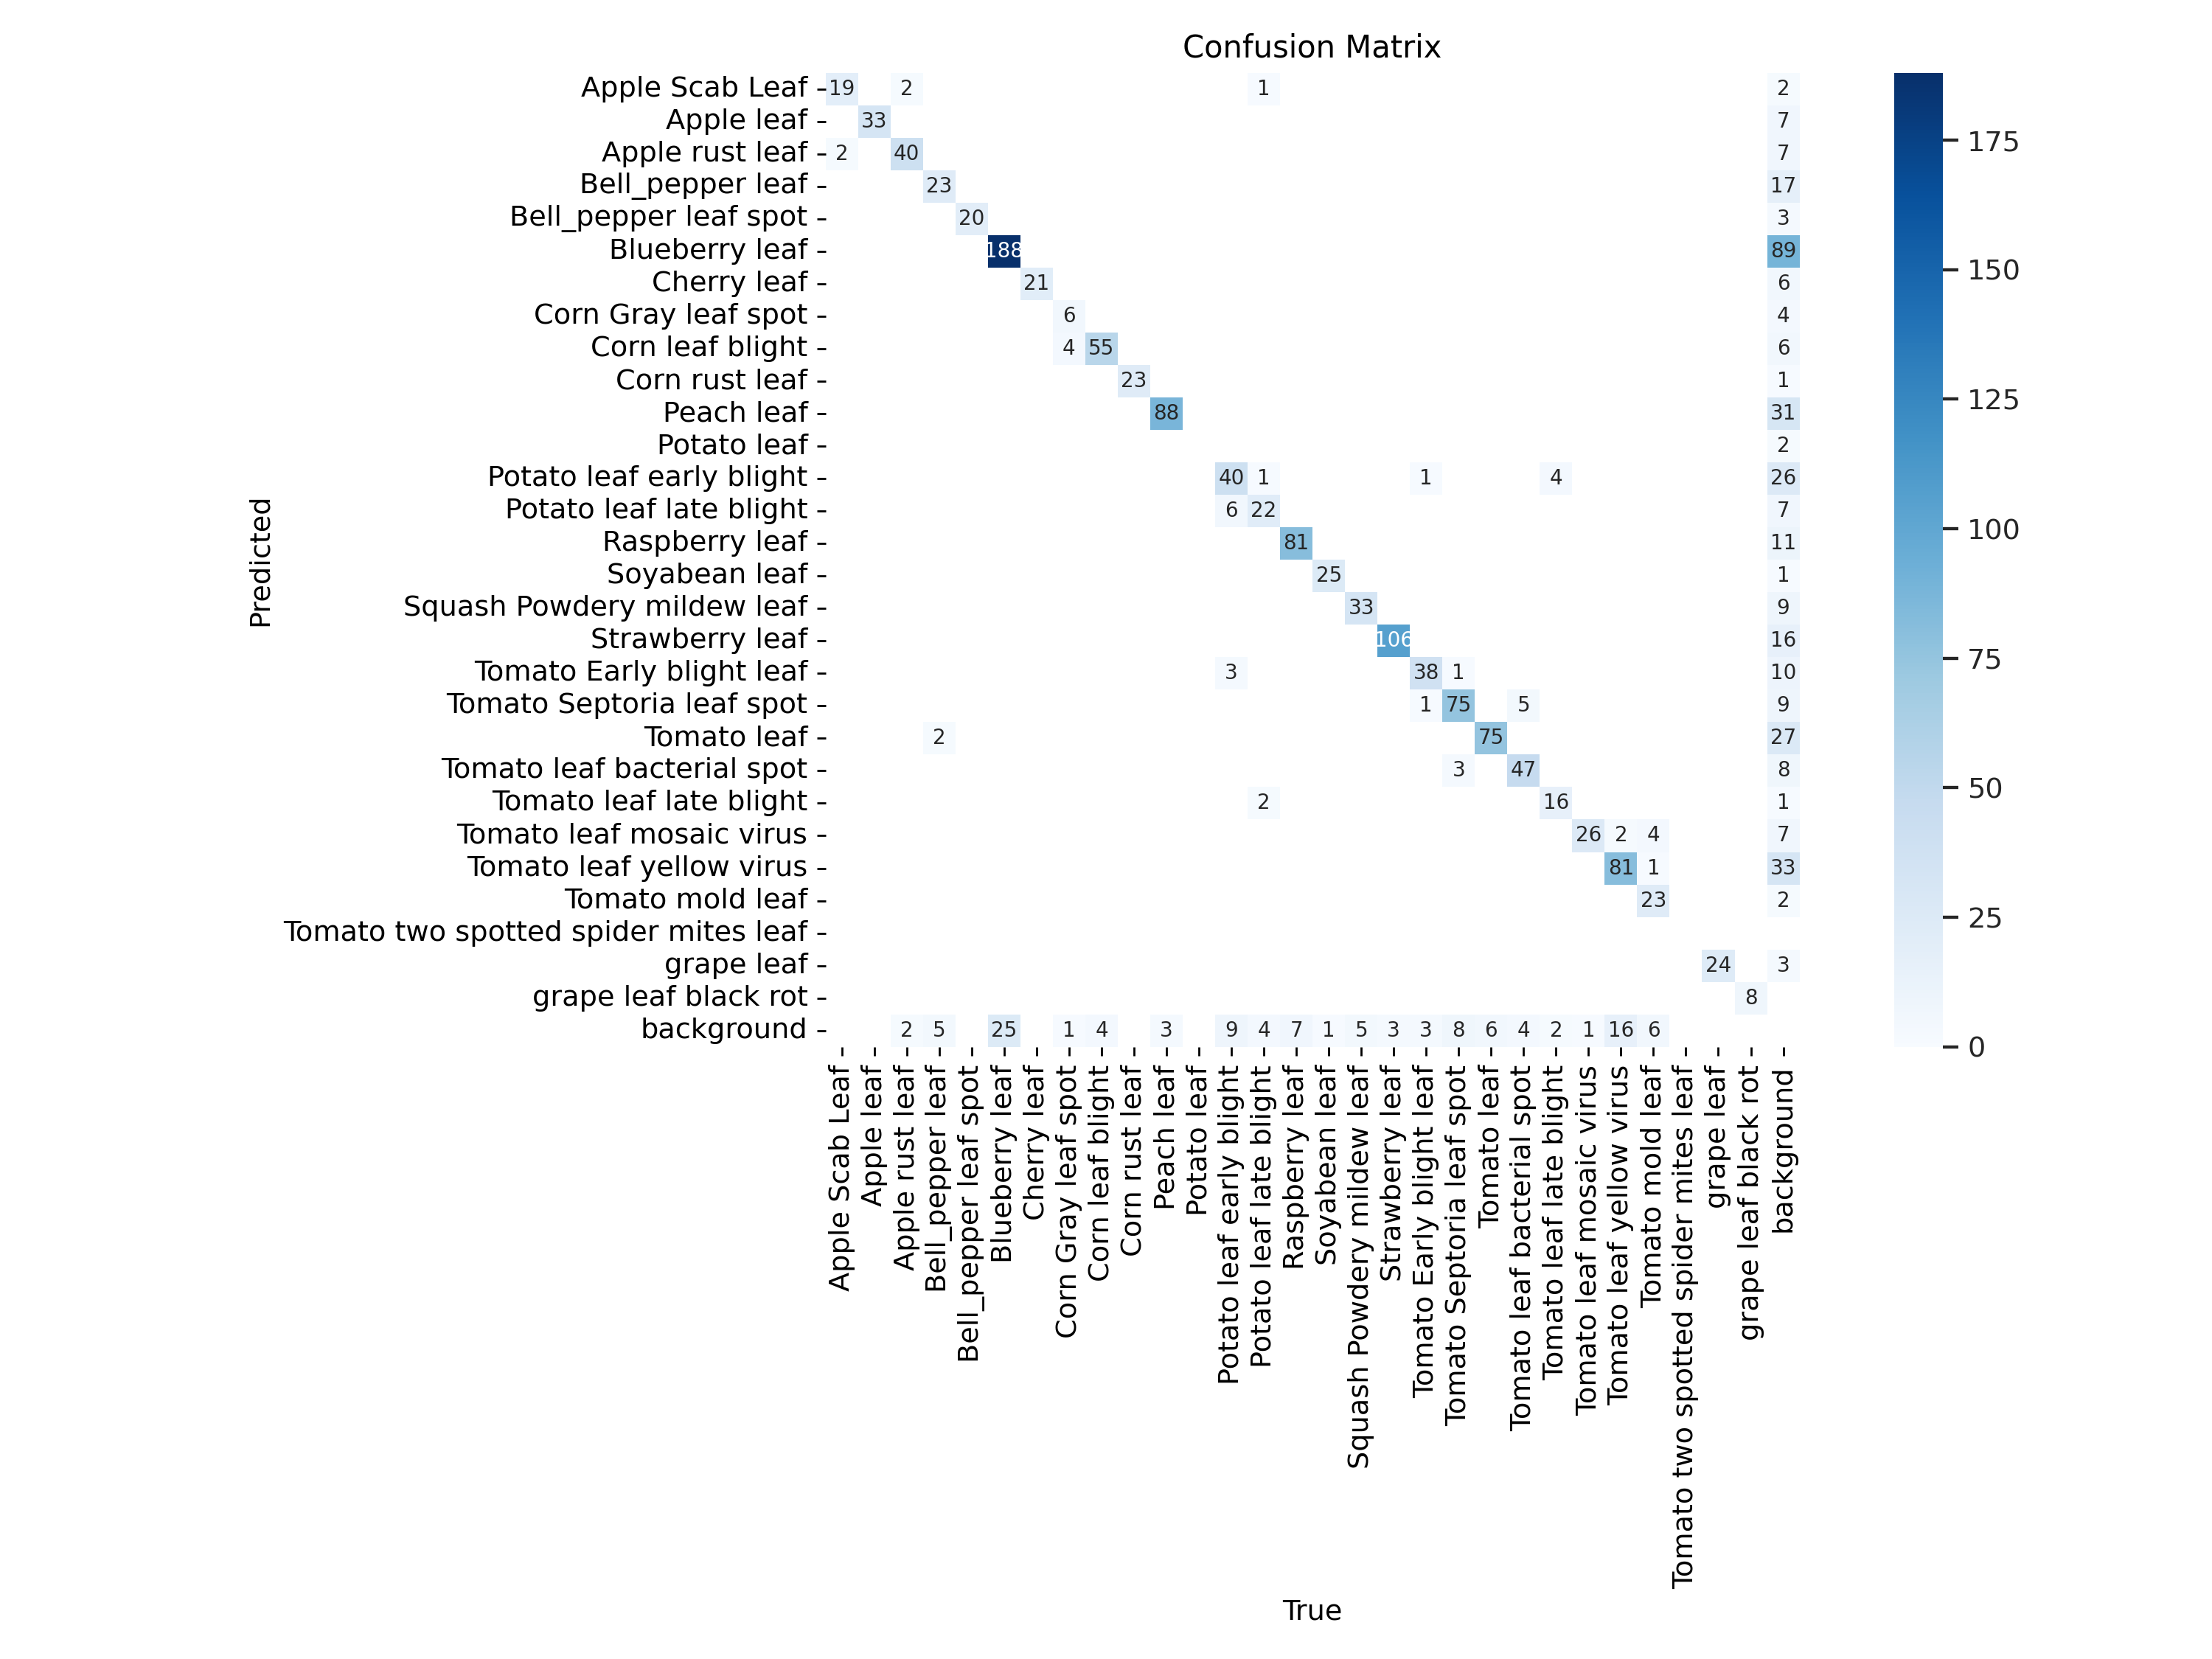

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_finetune2/confusion_matrix.png', width=1000)

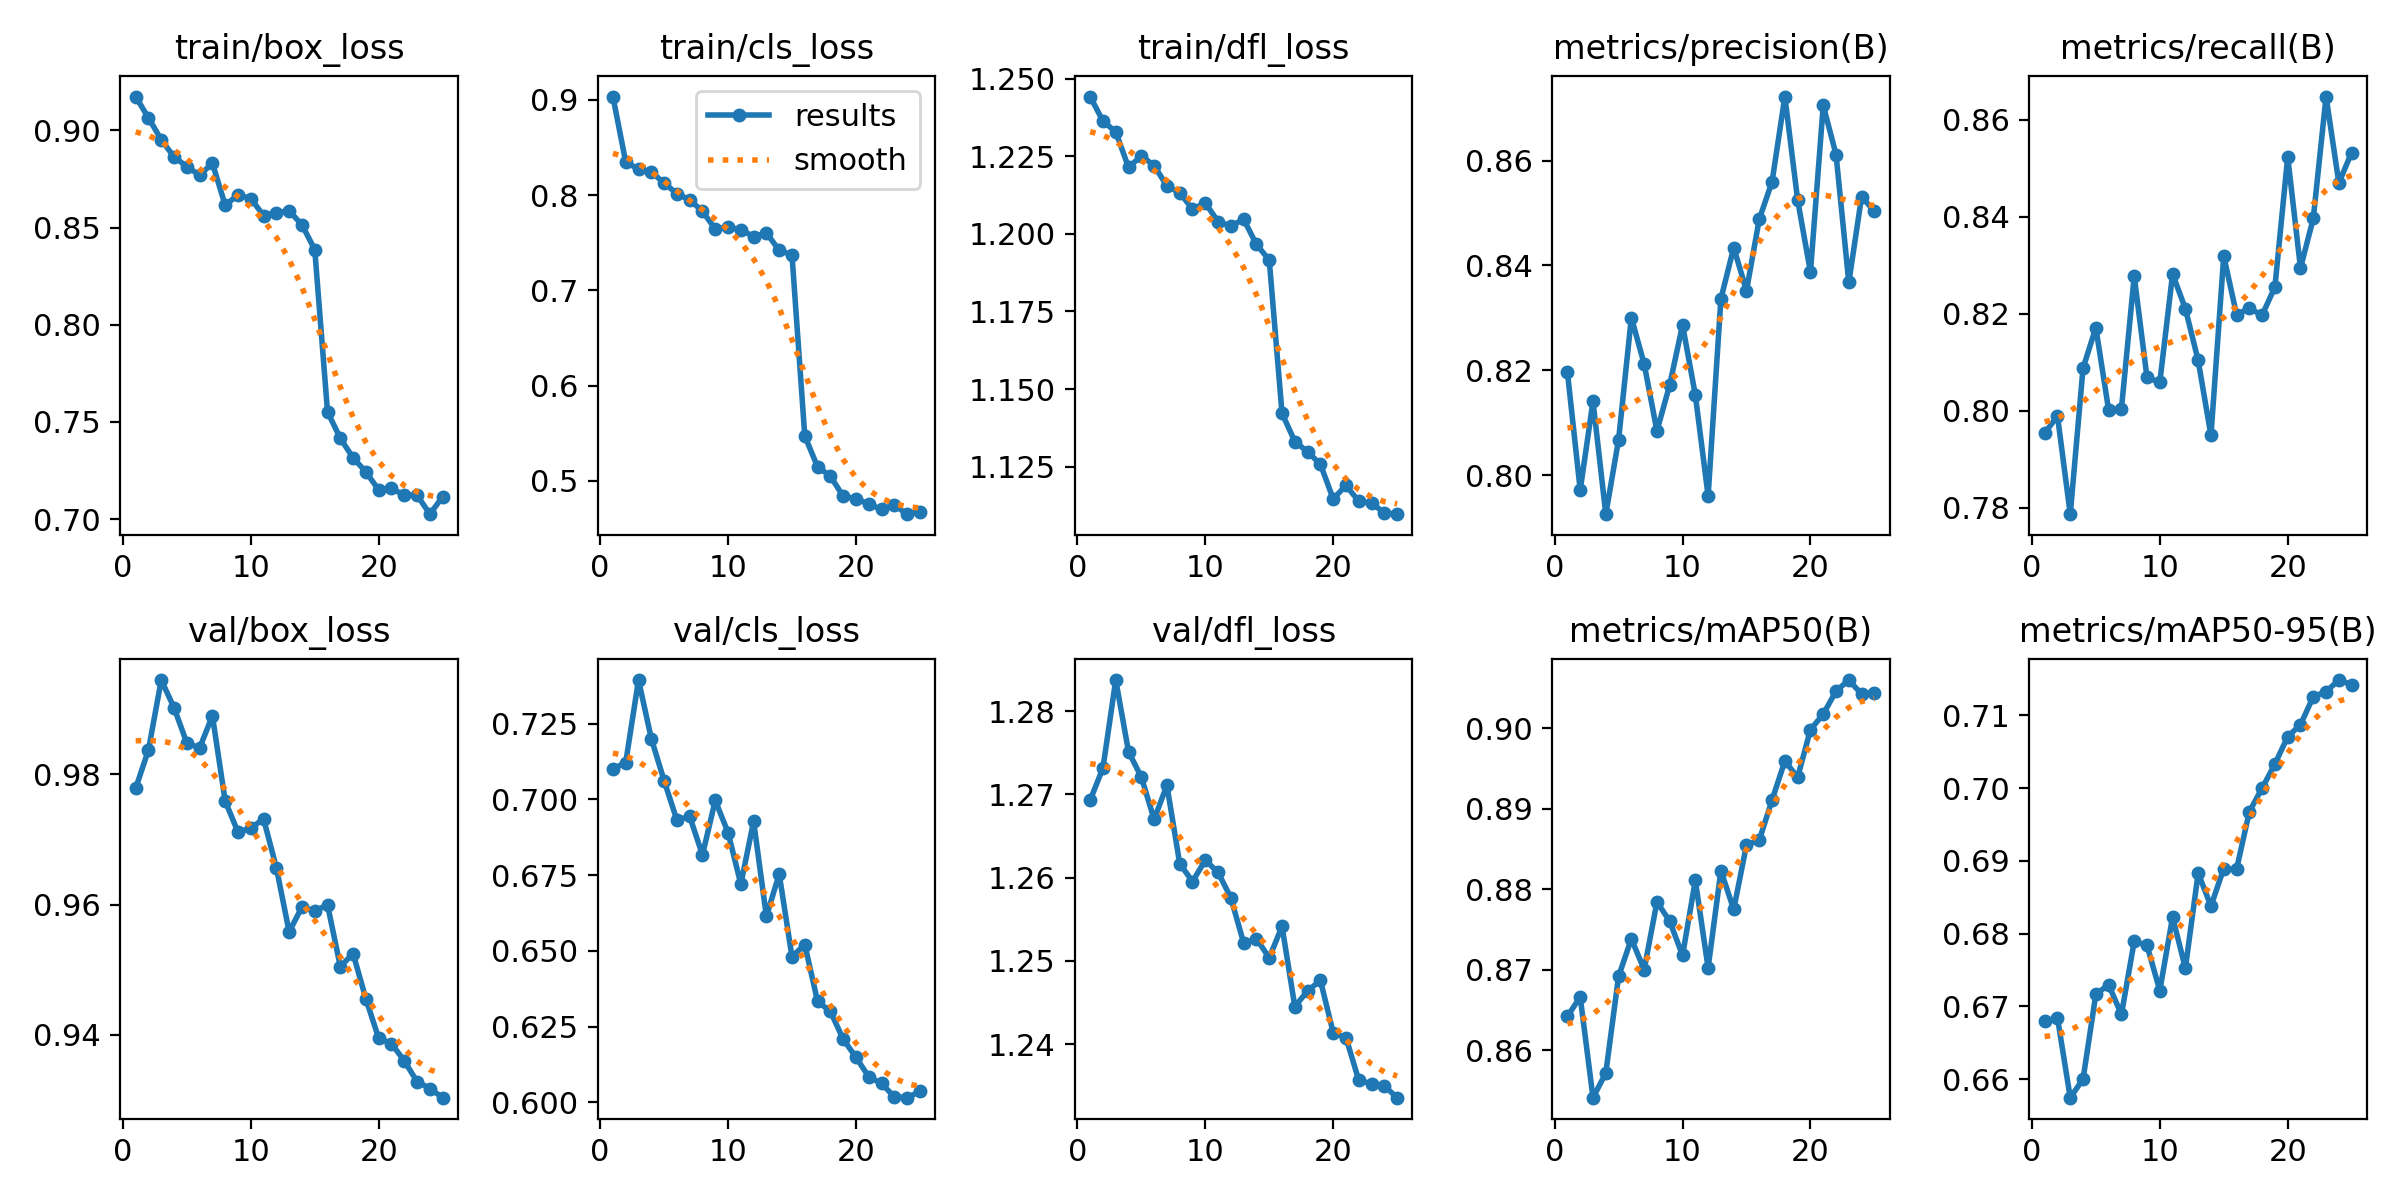

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_finetune2/results.png', width=1000)

In [ ]:
import yaml
from pathlib import Path
from ultralytics import YOLO
import supervision as sv
from supervision.metrics import MeanAveragePrecision

# 1) Read your unified classes (optional, just to inspect)
cfg     = yaml.safe_load(Path('./data/combined.yaml').read_text())
classes = cfg['names']
print("Unified classes:", classes)

# 2) Load each test split, telling from_yolo to use data/combined.yaml
ds_a = sv.DetectionDataset.from_yolo(
    images_directory_path      = './plant-disease-1/test/images',
    annotations_directory_path = './plant-disease-1/test/labels',
    data_yaml_path             = './data/combined.yaml'   # <-- unified class list
)
ds_b = sv.DetectionDataset.from_yolo(
    images_directory_path      = './plants-diseases-detection-and-classification-12/test/images',
    annotations_directory_path = './plants-diseases-detection-and-classification-12/test/labels',
    data_yaml_path             = './data/combined.yaml'
)



# 4) Load your best YOLOv12m checkpoint
model = YOLO('runs/detect/yolov12m_finetune2/weights/best.pt')

# 4) Collect predictions & targets by iterating both datasets
predictions, targets = [], []

for ds in (ds_a, ds_b):
    for img_path, image, target in ds:           # unpack path, image array, annotation
        results    = model(image, verbose=False)[0]
        dets       = sv.Detections.from_ultralytics(results)
        predictions.append(dets)
        targets.append(target)

# 5) Compute mAP
map_metric = MeanAveragePrecision()
map_metric.update(predictions, targets)
results_ = map_metric.compute()



# 1) Print the whole object for a quick overview


print([a for a in dir(results_) if not a.startswith("_")])

# Then you can print:
print(f"mAP @ 0.50    : {results_.map50:.4f}")
print(f"mAP @ 0.75    : {results_.map75:.4f}")
print(f"mAP @ 0.50‑95 : {results_.map50_95:.4f}")

# # 2) Access the main fields directly
# #   - mAP50   is the metric at IoU = 0.5
# #   - mAP50-95 is the averaged metric across IoUs 0.5→0.95
# #   - You may also have `map_75` for mAP@0.75, `ar1` for average recall at 1 detection, etc.
# print(f"mAP @ 0.50    : {results_.map_50:.4f}")
# print(f"mAP @ 0.50–0.95: {results_.map_50_95:.4f}")

# # 3) If you want every attribute dynamically:
# for attr in dir(results_):
#     if not attr.startswith("_"):
#         val = getattr(results_, attr)
#         # only print numeric metrics
#         if isinstance(val, (float, int)):
#             print(f"{attr:12s}: {val:.4f}")

Unified classes: ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']
['ap_per_class', 'iou_thresholds', 'is_class_agnostic', 'large_objects', 'mAP_scores', 'map50', 'map50_95', 'map75', 'matched_classes', 'medium_objects', 'metric_target', 'plot', 'small_objects', 'to_pandas']
mAP @ 0.50    : 0.7930
mAP @ 0.75    : 0.7248
mAP @ 0.50‑95 : 0.6216


# **Training and Fine tuning of the Yolov12 on weed dataset**

**Downloading the weed datset**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PXyshJrRfVCmSjU8CGgT")
project = rf.workspace("augmented-startups").project("weeds-nxe1w")
version = project.version(3)
dataset_weed = version.download("yolov12")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 135.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Weeds-3 in yolov12:: 100%|██████████| 8418/8418 [00:46<00:00, 180.77it/s]


In [ ]:
dataset_weed.location

'/content/drive/MyDrive/Yolov12/Weeds-3'

**Training and validating weed dataset**

In [ ]:
from ultralytics import YOLO

# 1. Load the YOLOv12m checkpoint
model = YOLO('yolov12m.pt')

# 2. Start training with your existing hyperparameters
results = model.train(
    data='/content/drive/MyDrive/Yolov12/Weeds-3/data.yaml',     # path to your merged data.yaml
    epochs=60,                     # total training epochs
    batch=16,                      # batch size
    imgsz=640,                     # image resolution
    project='runs/detect',          # folder to store logs & weights
    name='yolov12m_weed_train',         # subfolder name
    optimizer='adam',              # optimizer
    lr0=1e-3,                      # initial learning rate
    lrf=0.01,                      # final lr = lr0 * lrf
    weight_decay=1e-4,             # weight decay
    warmup_epochs=3,               # warmup phase duration
    warmup_momentum=0.9,           # warmup momentum
    warmup_bias_lr=1e-2,           # warmup bias lr
    patience=20,                   # early stopping patience
    conf=0.01,                     # training‑time confidence threshold
    iou=0.7,                       # training‑time IoU threshold
    amp=True                       # automatic mixed precision
)
# 3) Re‐validate on your combined test set
best_ft = f"runs/detect/yolov12m_weed_train/weights/best.pt"
metrics = YOLO(best_ft).val(data='/content/drive/MyDrive/Yolov12/Weeds-3/data.yaml', imgsz=640, batch=16)
print(metrics)

New https://pypi.org/project/ultralytics/8.3.111 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=detect, mode=train, model=yolov12m.pt, data=/content/drive/MyDrive/Yolov12/Weeds-3/data.yaml, epochs=60, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/detect, name=yolov12m_weed_train, exist_ok=False, pretrained=True, optimizer=adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.01, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

100%|██████████| 755k/755k [00:00<00:00, 13.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2, 1, 2]         
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    147968  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2, 1, 4]        
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2664960  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

train: Scanning /content/drive/MyDrive/Yolov12/Weeds-3/train/labels... 3664 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3664/3664 [00:34<00:00, 105.68it/s]


train: New cache created: /content/drive/MyDrive/Yolov12/Weeds-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/Yolov12/Weeds-3/valid/labels... 359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 359/359 [00:02<00:00, 139.49it/s]


val: New cache created: /content/drive/MyDrive/Yolov12/Weeds-3/valid/labels.cache
Plotting labels to runs/detect/yolov12m_weed_train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 131 weight(decay=0.0), 138 weight(decay=0.0001), 137 bias(decay=0.0)
TensorBoard: WARNING ⚠️ TensorBoard graph visualization failure Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.ultralytics.nn.tasks.DetectionModel,
		        %x.1 : Tensor):
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_21 : __torch__.ultralytics.nn.modules.head.Detect = prim::GetAttr[name="21"](%model)
		    %model.43 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%self.1)
		    %_20 : __torch__.ultralytics.nn.modules.block.C3k2 = prim::GetAttr[name="20"](%model.43)
		    %model.41 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr

       1/60      9.43G      1.578      1.653      1.759         97        640: 100%|██████████| 229/229 [00:46<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]

                   all        359        920      0.622       0.59      0.598      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      9.26G      1.562      1.465      1.746         79        640: 100%|██████████| 229/229 [00:42<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]

                   all        359        920      0.708      0.643      0.679      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      9.32G      1.532      1.416      1.716         85        640: 100%|██████████| 229/229 [00:41<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.86it/s]

                   all        359        920      0.826      0.703      0.788      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      9.26G      1.486      1.304      1.676         68        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.87it/s]

                   all        359        920        0.8      0.723      0.812      0.446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      9.31G      1.433       1.21      1.628         95        640: 100%|██████████| 229/229 [00:41<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        359        920      0.851      0.771      0.862      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      9.31G      1.401      1.147      1.603        110        640: 100%|██████████| 229/229 [00:41<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        359        920       0.84      0.805      0.871      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60       9.3G       1.36      1.081      1.576         72        640: 100%|██████████| 229/229 [00:41<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        359        920      0.896      0.805      0.903      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      9.81G      1.339      1.042      1.548         74        640: 100%|██████████| 229/229 [00:41<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.00it/s]

                   all        359        920      0.862      0.807      0.872      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      9.33G      1.323      1.025      1.542         83        640: 100%|██████████| 229/229 [00:41<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]

                   all        359        920      0.904      0.831       0.93      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      9.31G      1.299     0.9659      1.513         77        640: 100%|██████████| 229/229 [00:41<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.59it/s]

                   all        359        920      0.864      0.863      0.931      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      9.32G      1.278     0.9503       1.49         79        640: 100%|██████████| 229/229 [00:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]

                   all        359        920      0.892      0.837      0.928      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60       9.8G      1.243     0.9098      1.472         90        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        359        920      0.874      0.867      0.923      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      9.29G      1.235     0.8868      1.456         61        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        359        920      0.889      0.891      0.943      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60       9.3G      1.216     0.8617      1.441         58        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]

                   all        359        920      0.913      0.869      0.943      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60      9.32G      1.198     0.8533      1.443         51        640: 100%|██████████| 229/229 [00:41<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.07it/s]

                   all        359        920      0.897      0.875      0.943       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60      9.29G      1.193     0.8421      1.427         74        640: 100%|██████████| 229/229 [00:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]

                   all        359        920      0.888      0.899      0.942      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      9.29G      1.173     0.8108      1.416         57        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        359        920      0.905      0.879      0.944       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      9.29G      1.177      0.807      1.415         73        640: 100%|██████████| 229/229 [00:41<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]

                   all        359        920      0.925      0.915      0.958      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      9.29G      1.153     0.7763      1.399         81        640: 100%|██████████| 229/229 [00:41<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]

                   all        359        920      0.915      0.884      0.953      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      9.78G      1.138     0.7686      1.388         76        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]

                   all        359        920      0.919      0.921      0.961      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      9.29G      1.127     0.7652      1.383         69        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.05it/s]

                   all        359        920      0.921      0.899      0.955      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60      9.29G      1.105     0.7392      1.369         76        640: 100%|██████████| 229/229 [00:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        359        920      0.918      0.909      0.957      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      9.32G      1.094     0.7254      1.354        109        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:01<00:00,  6.10it/s]

                   all        359        920      0.904      0.913      0.954      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60       9.8G      1.087     0.7066       1.34         59        640: 100%|██████████| 229/229 [00:41<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]

                   all        359        920      0.925      0.897      0.953      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      9.29G      1.057     0.6943       1.32         71        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.87it/s]

                   all        359        920      0.924      0.911      0.948      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      9.29G      1.047     0.6843      1.314         91        640: 100%|██████████| 229/229 [00:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.71it/s]

                   all        359        920       0.93      0.929      0.965      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60       9.3G      1.022     0.6708      1.308         56        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]

                   all        359        920      0.909      0.937      0.962      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      9.27G      1.027     0.6589      1.306         85        640: 100%|██████████| 229/229 [00:41<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        359        920      0.931      0.915      0.967      0.748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60       9.3G      1.012     0.6518      1.294        104        640: 100%|██████████| 229/229 [00:41<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]

                   all        359        920      0.929      0.941      0.961      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      9.29G      1.012     0.6556      1.293         65        640: 100%|██████████| 229/229 [00:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]

                   all        359        920      0.923      0.933      0.965      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60       9.3G     0.9872      0.635      1.276         72        640: 100%|██████████| 229/229 [00:40<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]

                   all        359        920      0.922      0.939      0.967      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      9.22G     0.9798     0.6278      1.273         83        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        359        920      0.925      0.938      0.964      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      9.29G     0.9713     0.6207      1.265         82        640: 100%|██████████| 229/229 [00:40<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.91it/s]

                   all        359        920      0.929      0.927      0.969      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      9.29G     0.9741     0.6096      1.258         79        640: 100%|██████████| 229/229 [00:40<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        359        920      0.927      0.935      0.965      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60       9.3G     0.9572     0.5964      1.253         85        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]

                   all        359        920      0.932      0.926      0.963      0.744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      9.29G      0.948     0.5971      1.252         45        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]

                   all        359        920      0.933      0.932      0.968      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60       9.3G     0.9404       0.59      1.241         39        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        359        920      0.937      0.943      0.973      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      9.31G     0.9405     0.5922       1.24         82        640: 100%|██████████| 229/229 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]

                   all        359        920      0.931      0.954      0.971      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60       9.3G     0.9197     0.5774      1.222         61        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]

                   all        359        920      0.935      0.952      0.973      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      9.81G     0.9185     0.5694      1.228         94        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]

                   all        359        920      0.935      0.938      0.971      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60       9.3G     0.8997     0.5541      1.212         59        640: 100%|██████████| 229/229 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]

                   all        359        920      0.927      0.937      0.969      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60      9.31G     0.9029      0.559      1.218         79        640: 100%|██████████| 229/229 [00:41<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]

                   all        359        920      0.924      0.953      0.972       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      9.29G      0.882     0.5422      1.204         70        640: 100%|██████████| 229/229 [00:40<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.86it/s]

                   all        359        920      0.931      0.945      0.972      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      9.25G     0.8637     0.5307       1.19        109        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        359        920      0.942      0.934      0.971       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      9.28G     0.8653     0.5286       1.19         79        640: 100%|██████████| 229/229 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        359        920      0.936       0.95      0.974      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      9.29G     0.8676     0.5266      1.187         90        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]

                   all        359        920      0.933      0.954      0.972      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      9.32G     0.8458     0.5069      1.173        106        640: 100%|██████████| 229/229 [00:41<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        359        920      0.949      0.941      0.971      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      9.26G     0.8429     0.5084      1.173         77        640: 100%|██████████| 229/229 [00:40<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.93it/s]

                   all        359        920      0.931      0.961      0.972      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60       9.3G     0.8497     0.5068      1.175         66        640: 100%|██████████| 229/229 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        359        920      0.924      0.965      0.975      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      9.27G     0.8325     0.4992       1.17         63        640: 100%|██████████| 229/229 [00:41<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        359        920      0.951      0.928      0.973      0.787


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      9.32G       0.79     0.4015      1.142         50        640: 100%|██████████| 229/229 [00:42<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        359        920      0.946      0.939      0.974        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      9.77G     0.7801     0.3903      1.127         34        640: 100%|██████████| 229/229 [00:41<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.60it/s]

                   all        359        920       0.95      0.937      0.972        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      9.32G     0.7603     0.3709      1.114         41        640: 100%|██████████| 229/229 [00:41<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        359        920       0.95      0.933      0.971        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60       9.3G      0.757     0.3713      1.119         51        640: 100%|██████████| 229/229 [00:40<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.99it/s]

                   all        359        920      0.927      0.961      0.972      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      9.28G     0.7469     0.3657      1.103         51        640: 100%|██████████| 229/229 [00:41<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]

                   all        359        920      0.946      0.941      0.973      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      9.77G     0.7347     0.3573      1.092         44        640: 100%|██████████| 229/229 [00:40<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.83it/s]

                   all        359        920      0.946      0.935      0.974      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      9.28G      0.717     0.3464      1.081         38        640: 100%|██████████| 229/229 [00:40<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        359        920      0.935      0.952      0.975      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      9.27G      0.718     0.3486      1.087         46        640: 100%|██████████| 229/229 [00:40<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        359        920      0.952      0.939      0.975      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60       9.3G     0.7046     0.3432      1.078         54        640: 100%|██████████| 229/229 [00:41<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.77it/s]

                   all        359        920      0.945      0.943      0.974      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      9.79G     0.6992     0.3369      1.071         47        640: 100%|██████████| 229/229 [00:40<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.91it/s]

                   all        359        920      0.946      0.943      0.975      0.812



60 epochs completed in 0.747 hours.
Optimizer stripped from runs/detect/yolov12m_weed_train/weights/last.pt, 39.7MB
Optimizer stripped from runs/detect/yolov12m_weed_train/weights/best.pt, 39.7MB

Validating runs/detect/yolov12m_weed_train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 402 layers, 19,577,299 parameters, 0 gradients, 59.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]


                   all        359        920      0.946      0.943      0.975      0.811
Speed: 0.1ms preprocess, 2.5ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/yolov12m_weed_train
Ultralytics 8.3.63 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv12m summary (fused): 402 layers, 19,577,299 parameters, 0 gradients, 59.5 GFLOPs


val: Scanning /content/drive/MyDrive/Yolov12/Weeds-3/valid/labels.cache... 359 images, 0 backgrounds, 0 corrupt: 100%|██████████| 359/359 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:04<00:00,  4.88it/s]


                   all        359        920      0.946      0.943      0.975      0.801
Speed: 0.2ms preprocess, 4.2ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val4
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fa8983e98d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/yolov12m_weed_train/

args.yaml					   train_batch11450.jpg
confusion_matrix_normalized.png			   train_batch11451.jpg
confusion_matrix.png				   train_batch11452.jpg
events.out.tfevents.1745040691.970da6f6fc90.316.0  train_batch1.jpg
F1_curve.png					   train_batch2.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


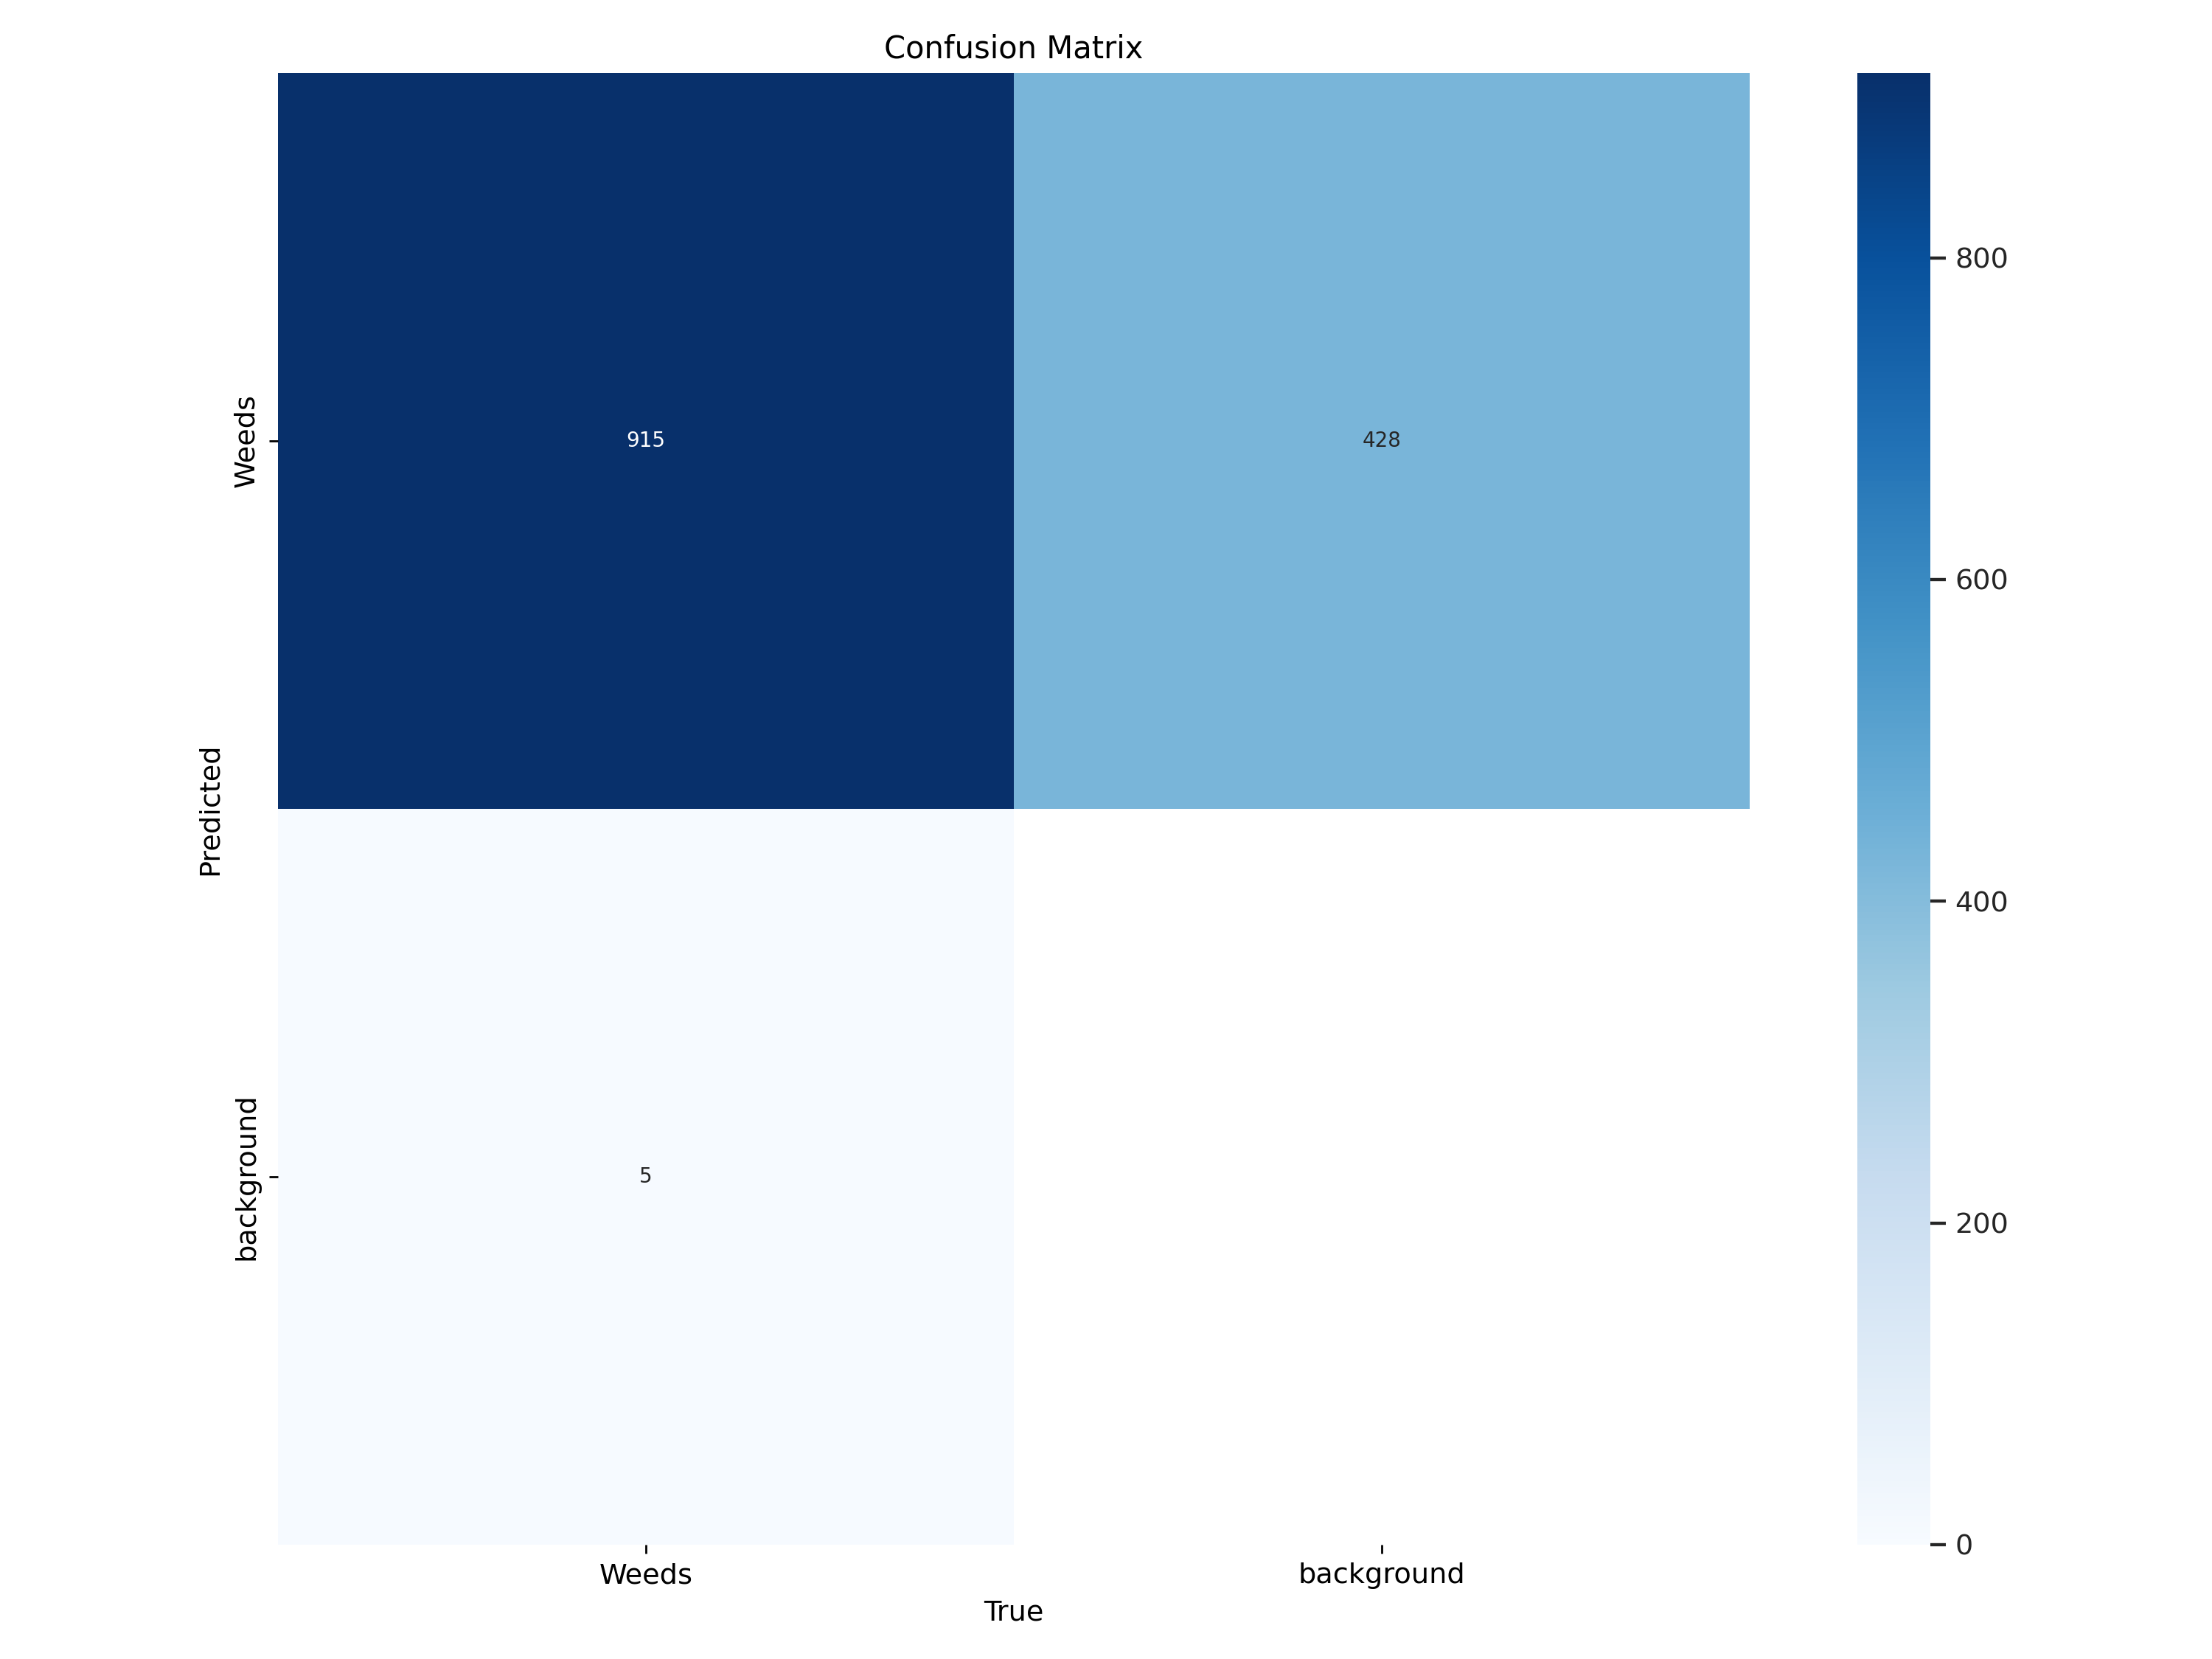

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_weed_train/confusion_matrix.png', width=1000)

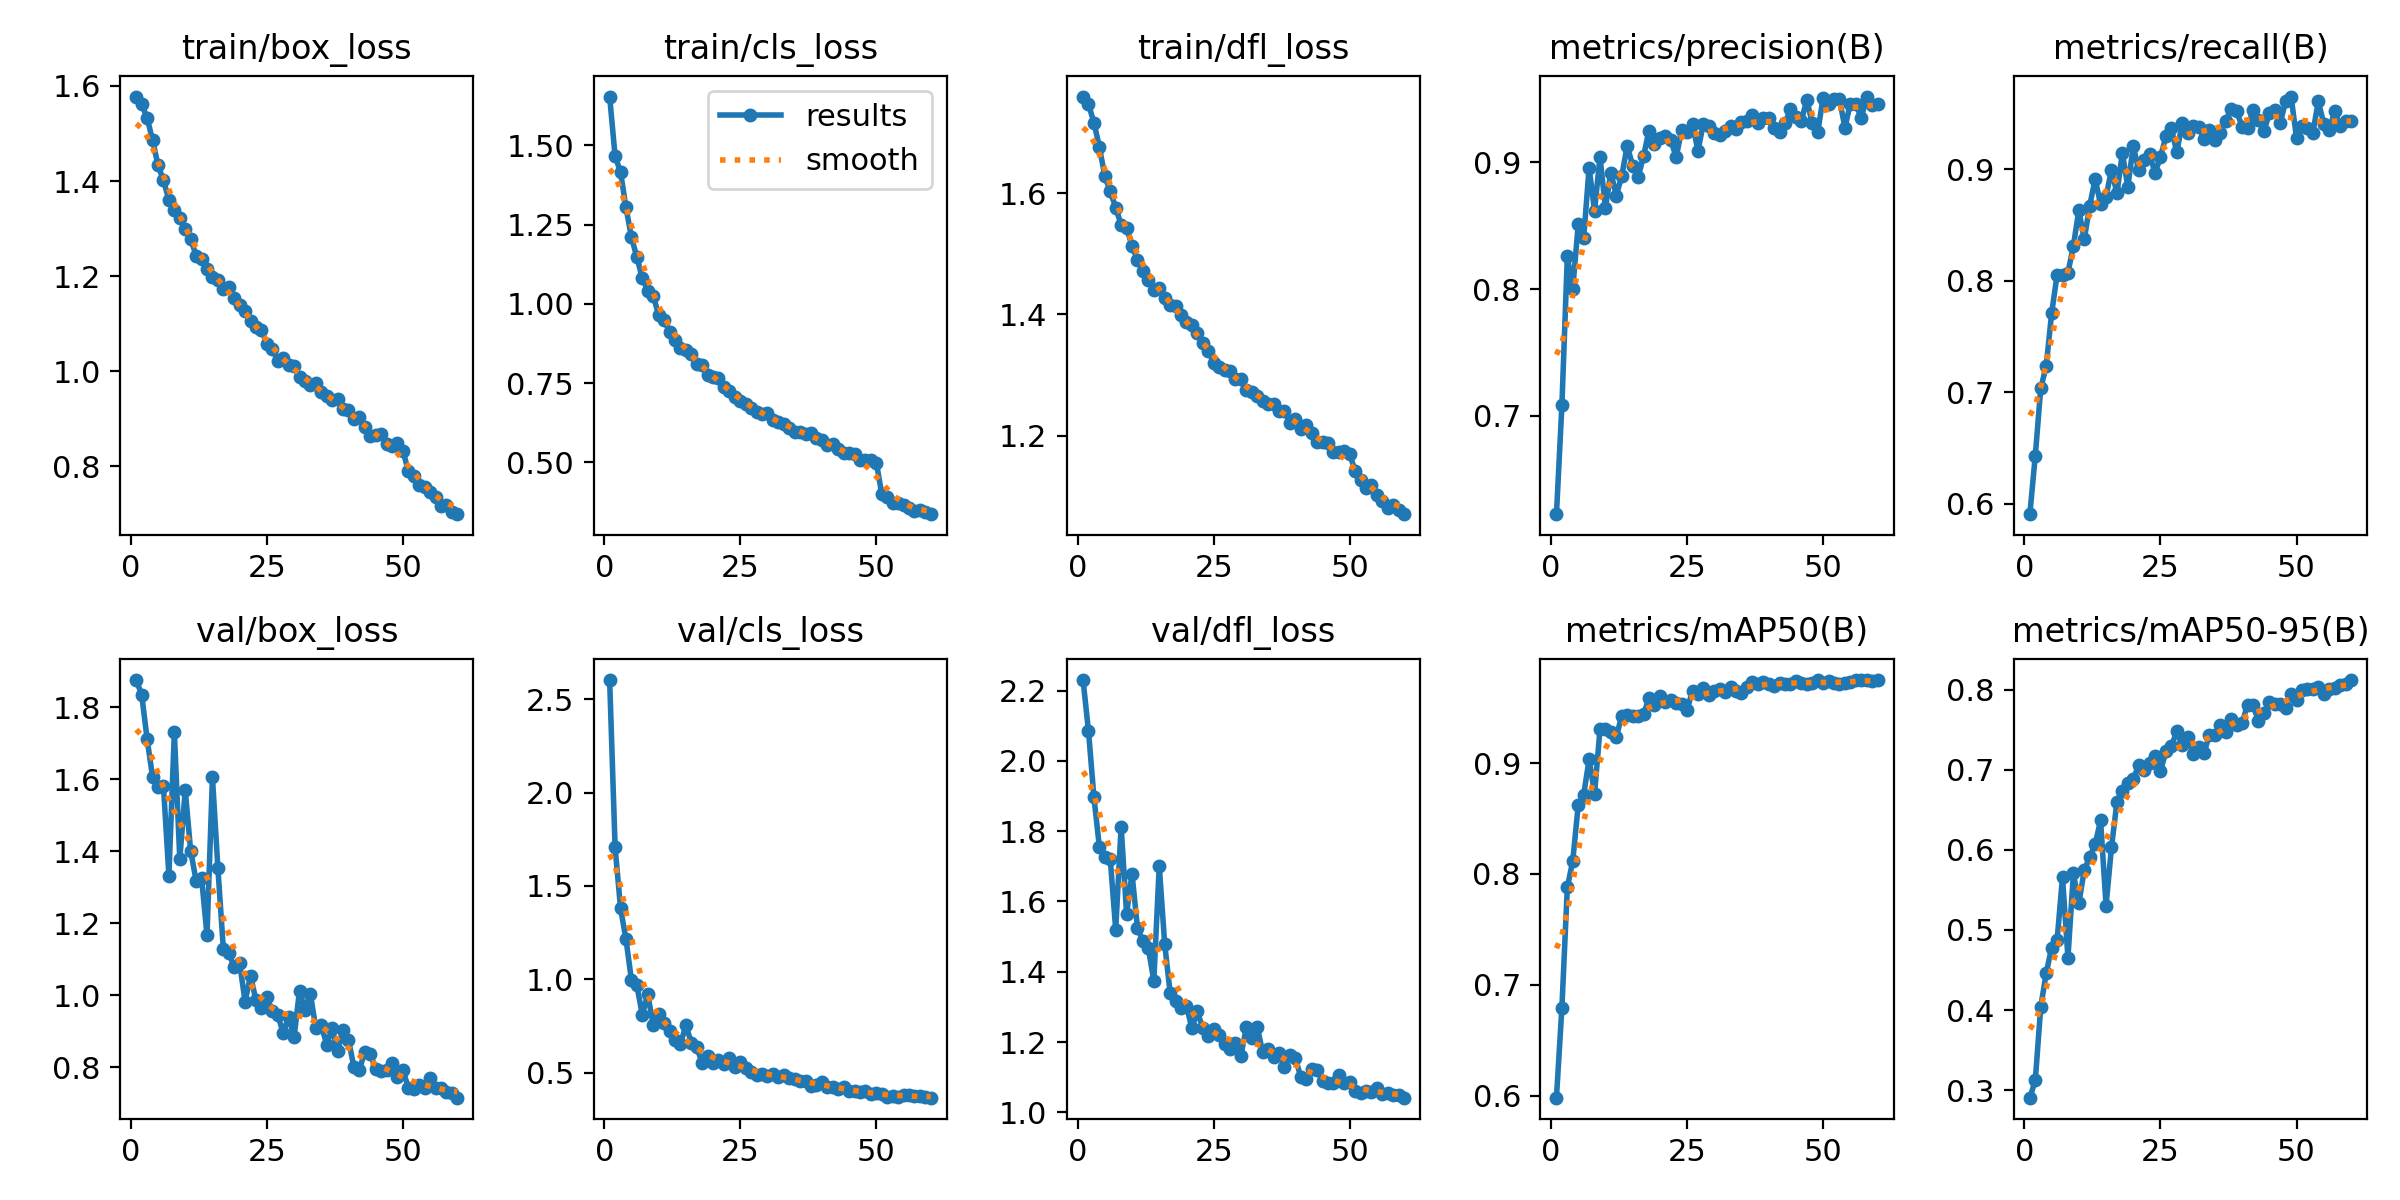

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/yolov12m_weed_train/results.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset_weed.location}/test/images",
    annotations_directory_path=f"{dataset_weed.location}/test/labels",
    data_yaml_path=f"{dataset_weed.location}/data.yaml"
)

ds.classes

['Weeds']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/yolov12m_weed_train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.753562836003015
mAP 50 0.9756246803758877
mAP 75 0.8799736719954525


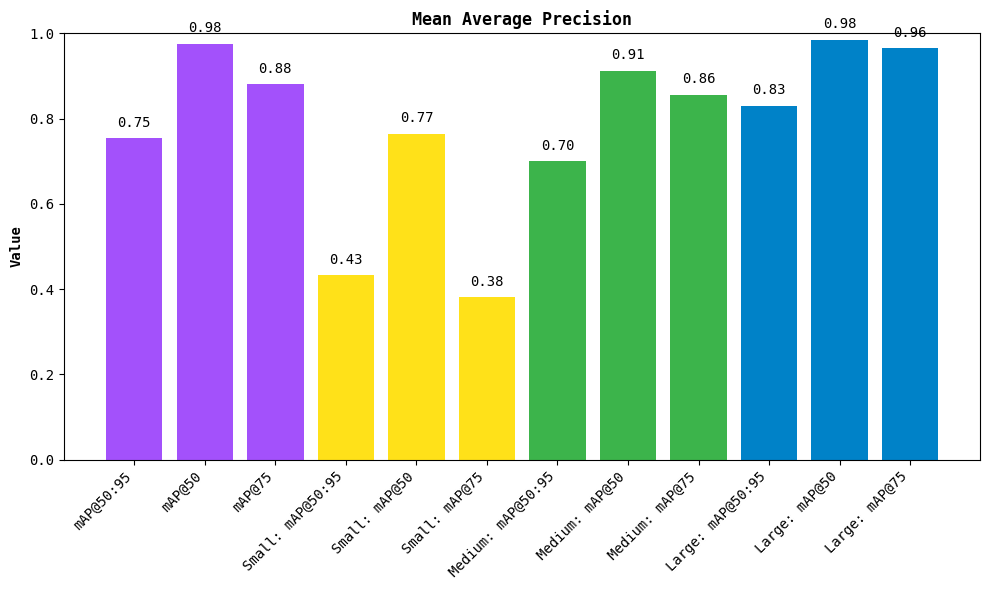

In [ ]:
map.plot()

# **Model Zoo Aproach**


0: 640x640 1 Potato leaf early blight, 1 Potato leaf late blight, 394.6ms
Speed: 3.0ms preprocess, 394.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Weeds, 345.0ms
Speed: 2.4ms preprocess, 345.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


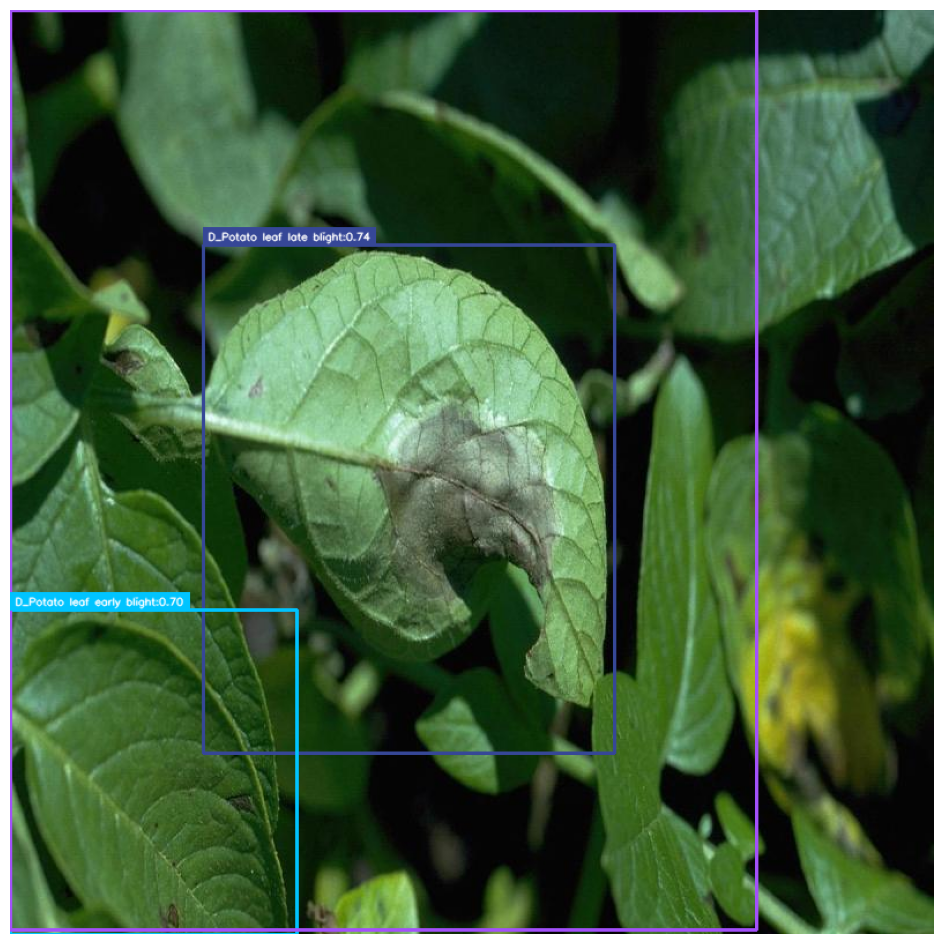

In [66]:
import cv2
import numpy as np
from ultralytics import YOLO
import supervision as sv

# 1) Load your two specialist checkpoints
disease_model = YOLO("runs/detect/yolov12m_finetune2/weights/best.pt")
weed_model    = YOLO("runs/detect/yolov12m_weed_train/weights/best.pt")

def detect_both(image,disease_conf=0.5, weed_conf=0.5):
    # A) inference
    dres = disease_model(image,conf=disease_conf)[0]
    wres = weed_model(image,conf=weed_conf)[0]

    # B) convert to Supervision
    dd = sv.Detections.from_ultralytics(dres)
    wd = sv.Detections.from_ultralytics(wres)

    # C) embed conf into the class_name for each
    dd.class_name = [
        f"D_{disease_model.names[cid]}:{conf:.2f}"
        for cid, conf in zip(dd.class_id, dd.confidence)
    ]
    wd.class_name = [
        f"W_{weed_model.names[cid]}:{conf:.2f}"
        for cid, conf in zip(wd.class_id, wd.confidence)
    ]

    # D) merge all fields into one Detections
    xyxy = np.vstack([*dd.xyxy, *wd.xyxy])
    conf = np.hstack([ dd.confidence,      wd.confidence ])
    cid  = np.hstack([ dd.class_id,        wd.class_id   ])
    names=            dd.class_name  +   wd.class_name

    merged = sv.Detections(xyxy=xyxy, confidence=conf, class_id=cid)
    merged.class_name = names
    return merged

# 2) Load your test image
img = cv2.imread("/content/drive/MyDrive/Yolov12/Plants-Diseases-Detection-and-Classification-12/test/images/1200px-Late_blight_on_potato_leaf_2_jpg.rf.4f61a906568a67439a045d973c26c739.jpg")

# 3) Run both detectors & merge
dets = detect_both(img,0.6,0.8)
# print(dets.class_name)
# print(dets)

# 4) Draw them
box_annotator  = sv.BoxAnnotator()
label_annotator= sv.LabelAnnotator(text_padding=4,text_scale=0.3,text_thickness=1)

canvas = box_annotator.annotate(scene=img.copy(),   detections=dets)
canvas = label_annotator.annotate(scene=canvas,    detections=dets, labels=dets.class_name)

# 5) Show final result
sv.plot_image(canvas)

# **Integrating Gpt for disease analysis**

In [74]:
%pip install --upgrade openai --quiet

In [75]:
import json

In [76]:
from openai import OpenAI
import os

## Set the API key and model name
MODEL="gpt-4o"

from google.colab import userdata

client = OpenAI(api_key=userdata.get('openai'))

In [77]:
completion = client.chat.completions.create(
  model=MODEL,
  messages=[
    {"role": "system", "content": "You are a helpful assistant. Help me with my math homework!"}, # <-- This is the system message that provides context to the model
    {"role": "user", "content": "Hello! Could you solve 2+2?"}  # <-- This is the user message for which the model will generate a response
  ]
)

print("Assistant: " + completion.choices[0].message.content)

Assistant: Hello! Yes, I can help with that. \(2 + 2 = 4\).


In [106]:
import json
import cv2
from ultralytics import YOLO

# load model
disease_model = YOLO("runs/detect/yolov12m_finetune2/weights/best.pt")

def process_image(image, confidence_threshold=0.5):
    # run inference
    results = disease_model(image)
    classNames = ['Apple Scab Leaf', 'Apple leaf', 'Apple rust leaf', 'Bell_pepper leaf', 'Bell_pepper leaf spot', 'Blueberry leaf', 'Cherry leaf', 'Corn Gray leaf spot', 'Corn leaf blight', 'Corn rust leaf', 'Peach leaf', 'Potato leaf', 'Potato leaf early blight', 'Potato leaf late blight', 'Raspberry leaf', 'Soyabean leaf', 'Squash Powdery mildew leaf', 'Strawberry leaf', 'Tomato Early blight leaf', 'Tomato Septoria leaf spot', 'Tomato leaf', 'Tomato leaf bacterial spot', 'Tomato leaf late blight', 'Tomato leaf mosaic virus', 'Tomato leaf yellow virus', 'Tomato mold leaf', 'Tomato two spotted spider mites leaf', 'grape leaf', 'grape leaf black rot']

    # collect unique detections
    detected_names = set()

    # draw all boxes and fill the set
    for result in results:
        for box in result.boxes:
            conf = float(box.conf[0])
            if conf < confidence_threshold:
                continue

            cls_id = int(box.cls[0])
            name = classNames[cls_id]
            detected_names.add(name)

            x1, y1, x2, y2 = map(int, box.xyxy[0])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0,255,0), 2)
            cv2.putText(
                image,
                f"{name}: {conf:.2f}",
                (x1, max(0, y1-10)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.8, (255,255,0), 3
            )

    if not detected_names:
        return image, [], "No confident detections"

    # load your few‑shot advice map
    with open("./farm_advice_examples_updated.json", "r") as f:
        examples_map = json.load(f)

    # build a combined prompt for all unique diseases
    prompt_lines = []
    for name in detected_names:
        fs_entries = examples_map.get(name, [])
        for entry in fs_entries:
            prompt_lines.append(f"Detected: {entry['Detected']}")
            prompt_lines.append("Advice:")
            for advice in entry['Advice']:
                prompt_lines.append(f"- {advice}")
            prompt_lines.append("")  # spacer
        prompt_lines.append(f"Detected: {name}")
        prompt_lines.append("Advice:")
        prompt_lines.append("")  # leave space for the model to fill in

    prompt = "\n".join(prompt_lines)

    # call LLM
    try:
        resp = client.chat.completions.create(
            model="gpt-4o",
            messages=[
                {"role":"system", "content":"You are a helpful plant‑disease advice assistant."},
                {"role":"user",   "content":prompt}
            ],
            temperature=0.7,
        )
        advice = resp.choices[0].message.content
    except Exception as e:
        advice = f"Error generating advice: {e}"

    # return the image, a list of unique disease names, and the model’s advice
    return image, list(detected_names), advice








0: 640x640 4 Squash Powdery mildew leafs, 503.5ms
Speed: 6.6ms preprocess, 503.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Detected diseases: ['Squash Powdery mildew leaf']
Advice:
 It seems like you're dealing with a persistent case of powdery mildew on your squash plants. Here's a recap of the advice to help manage and control this fungal disease:

1. **Remove Affected Leaves**: Regularly inspect your plants and remove any leaves that show signs of white powdery patches. Discard these leaves properly to prevent the spread of the fungus.

2. **Chemical Treatment**: Use sulfur or potassium bicarbonate sprays on your plants. Apply these treatments every 7 days to help reduce the spread of the disease. Always follow the manufacturer's instructions for safe and effective use.

3. **Improve Airflow and Sunlight**: Train your squash vines to ensure they have adequate space. This improves airflow and sunlight exposure, which can reduce the humidity levels that favor

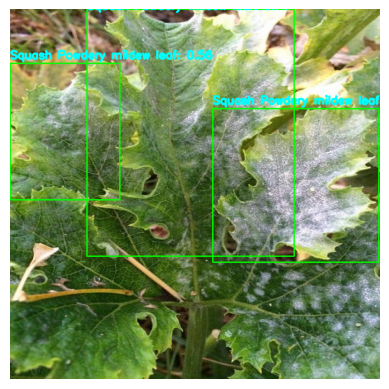

In [107]:
img = cv2.imread(img_path)
img, diseases, advice = process_image(img, 0.5)

# show
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

print("Detected diseases:", diseases)
print("Advice:\n", advice)